In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
import xarray as xr
import rioxarray
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

# Prepare Data for Modeling

## Read Grids

In [4]:
# Temperature

origtemp=xr.open_dataset('model/data/grid/ghcncams.air.mon.mean.nc')
temp_mu=origtemp.groupby("time.year").mean("time")

temp_mu.rio.write_crs('EPSG:4326', inplace=True)

# Precipitation

origprecip=xr.open_dataset('model/data/grid/precip.1990_2021.nc')
precip_mu=origprecip.groupby("time.year").sum("time")

precip_mu.rio.write_crs('EPSG:4326', inplace=True)

# Heatwave

hw=xr.open_dataset('waves/observed_cpc_heatwave.nc')
hwave=hw.transpose('lat','lon','time')

hwave.rio.set_spatial_dims('lon', 'lat')
hwave.rio.write_crs('EPSG:4326', inplace=True)

# Coldwave

cw=xr.open_dataset('waves/observed_cpc_coldwave.nc')  
cwave=cw.transpose('lat','lon','time').where(cw['tmin'] >= 0)

cwave.rio.set_spatial_dims('lon', 'lat')
cwave.rio.write_crs('EPSG:4326', inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: b'/Users/maeko/YangtzeModel/model/data/grid/precip.1990_2021.nc'

## Clip to Geography

In [ ]:
# Read SHP as GDF for clipping

gdf = gpd.read_file("model/data/shp/chn_adm_ocha_2020_shp",layer=2)

#Filter GDF

JS=gdf[gdf['ADM1_PCODE']=='CN032']
HB=gdf[gdf['ADM1_PCODE']=='CN042']
HN=gdf[gdf['ADM1_PCODE']=='CN043']
ZJ=gdf[gdf['ADM1_PCODE']=='CN033']
JX=gdf[gdf['ADM1_PCODE']=='CN036']
AH=gdf[gdf['ADM1_PCODE']=='CN034']
SH=gdf[gdf['ADM1_PCODE']=='CN031']

multiGDF=gpd.GeoDataFrame( pd.concat([JS,HB,HN,ZJ,JX,AH,SH], ignore_index=True) )

multiGDF

In [ ]:
#Clip grid data with GDF

JStemp=temp_mu.rio.clip(JS.geometry.values, JS.geometry.crs, drop=True)
HBtemp=temp_mu.rio.clip(HB.geometry.values, HB.geometry.crs, drop=True)
HNtemp=temp_mu.rio.clip(HN.geometry.values, HN.geometry.crs, drop=True)
ZJtemp=temp_mu.rio.clip(ZJ.geometry.values, ZJ.geometry.crs, drop=True)
JXtemp=temp_mu.rio.clip(JX.geometry.values, JX.geometry.crs, drop=True)
AHtemp=temp_mu.rio.clip(AH.geometry.values, AH.geometry.crs, drop=True)
SHtemp=temp_mu.rio.clip(SH.geometry.values, SH.geometry.crs, drop=True)

JSsoil=soil_mu.rio.clip(JS.geometry.values, JS.geometry.crs, drop=True)
HBsoil=soil_mu.rio.clip(HB.geometry.values, HB.geometry.crs, drop=True)
HNsoil=soil_mu.rio.clip(HN.geometry.values, HN.geometry.crs, drop=True)
ZJsoil=soil_mu.rio.clip(ZJ.geometry.values, ZJ.geometry.crs, drop=True)
JXsoil=soil_mu.rio.clip(JX.geometry.values, JX.geometry.crs, drop=True)
AHsoil=soil_mu.rio.clip(AH.geometry.values, AH.geometry.crs, drop=True)
SHsoil=soil_mu.rio.clip(SH.geometry.values, SH.geometry.crs, drop=True)

JSprecip=precip_mu.rio.clip(JS.geometry.values, JS.geometry.crs, drop=True)
HBprecip=precip_mu.rio.clip(HB.geometry.values, HB.geometry.crs, drop=True)
HNprecip=precip_mu.rio.clip(HN.geometry.values, HN.geometry.crs, drop=True)
ZJprecip=precip_mu.rio.clip(ZJ.geometry.values, ZJ.geometry.crs, drop=True)
JXprecip=precip_mu.rio.clip(JX.geometry.values, JX.geometry.crs, drop=True)
AHprecip=precip_mu.rio.clip(AH.geometry.values, AH.geometry.crs, drop=True)
SHprecip=precip_mu.rio.clip(SH.geometry.values, SH.geometry.crs, drop=True)

JShwave=hwave.rio.clip(JS.geometry.values, JS.geometry.crs, drop=True)
HBhwave=hwave.rio.clip(HB.geometry.values, HB.geometry.crs, drop=True)
HNhwave=hwave.rio.clip(HN.geometry.values, HN.geometry.crs, drop=True)
ZJhwave=hwave.rio.clip(ZJ.geometry.values, ZJ.geometry.crs, drop=True)
JXhwave=hwave.rio.clip(JX.geometry.values, JX.geometry.crs, drop=True)
AHhwave=hwave.rio.clip(AH.geometry.values, AH.geometry.crs, drop=True)
SHhwave=hwave.rio.clip(SH.geometry.values, SH.geometry.crs, drop=True)

JScwave=cwave.rio.clip(JS.geometry.values, JS.geometry.crs, drop=True)
HBcwave=cwave.rio.clip(HB.geometry.values, HB.geometry.crs, drop=True)
HNcwave=cwave.rio.clip(HN.geometry.values, HN.geometry.crs, drop=True)
ZJcwave=cwave.rio.clip(ZJ.geometry.values, ZJ.geometry.crs, drop=True)
JXcwave=cwave.rio.clip(JX.geometry.values, JX.geometry.crs, drop=True)
AHcwave=cwave.rio.clip(AH.geometry.values, AH.geometry.crs, drop=True)
SHcwave=cwave.rio.clip(SH.geometry.values, SH.geometry.crs, drop=True)

multitemp=temp_mu.rio.clip(multiGDF.geometry.values, multiGDF.geometry.crs, drop=True)
multisoil=soil_mu.rio.clip(multiGDF.geometry.values, multiGDF.geometry.crs, drop=True)
multiprecip=precip_mu.rio.clip(multiGDF.geometry.values, multiGDF.geometry.crs, drop=True)
multihwave=hwave.rio.clip(multiGDF.geometry.values, multiGDF.geometry.crs, drop=True)
multicwave=cwave.rio.clip(multiGDF.geometry.values, multiGDF.geometry.crs, drop=True)

In [ ]:
JShwave['HeatWaveOccurence'][:,:,1]

## Make DataFrame

### Modeling

The model was based on a formula developed by Holst et al. (2013) structured after the Cobb-Douglas production function.

The Cobb-Douglas utility function generally asserts that

$$ q = f(x) = A \prod _ {n=1}^{N} x_n^{\lambda_{n}} $$

From that we fill in our variables. We will distinguish, for now, only between sown area $s$ and means of production $x_n$ (we will later add extraneous influencers $c_m$), therefore, we can express the expected total grain yield ($E(y_{it})$) as

Derived from this form, we therefore have an estimate of the average grain yield

$$ \bar y_{it}=\exp(\beta_0+
\sum _ {n=1}^{N}\beta_{ni} \ln x_{nit}+
\sum _ {m=1}^{M}\gamma_{mi} c_{mit})+
\epsilon$$

The impact of a unitary change in a certain climate variable ($\delta c_{mi}$) on mean grain yield ($\bar{y}_{ic}$) is then assessed via

$$\Delta \bar{y}_{ic}=\frac{\delta \bar y_i}{\delta c_{mi}} $$

### JS, HN, HB

In [ ]:
JSprecip['precip'][10,:].plot()

In [ ]:
# Jiangsu

df=pd.read_csv("model/data/province/data.jiangsu.csv")

df['TGrainOut']=df['TGrainOut']*10 #10kt - kt
df['SownArea']=df['SownArea']
df.drop('HHPopul',axis=1,inplace=True)
df['PrimInd']=df['PrimInd']*10 #10kpeople - kpeople
df['MechPower']=df['MechPower']*10 #10kkW - MW

temp=[]
for yr in JStemp['air'][42:74,:].to_numpy():
    s=np.nansum(yr)
    temp.append(s/np.count_nonzero(~np.isnan(yr))-273)  

soil=[]
for yr in JSsoil['soilw'][42:74,:].to_numpy():
    s=np.nansum(yr)
    soil.append(s/np.count_nonzero(~np.isnan(yr)))
    
precip=[]
for yr in JSprecip['precip'][:32,:].to_numpy():
    s=np.nansum(yr)
    precip.append(s/np.count_nonzero(~np.isnan(yr)))

hwave=[]
for i in range(10,42):
        f=JShwave['HeatWaveOccurence'][:,:,i].to_numpy()
        s=np.nansum(f)
        hwave.append(s/np.count_nonzero(~np.isnan(f)))
        
cwave=[]
for i in range(10,42):
        f=JScwave['tmin'][:,:,i].to_numpy()
        s=np.nansum(f)
        cwave.append(s/np.count_nonzero(~np.isnan(f)))

linvars=pd.DataFrame()
linvars['dt']=df['dt']
linvars['temp_mu']=temp
linvars['precip_mu']=precip
linvars['hwave']=hwave
linvars['cwave']=cwave

df.drop('dt', axis=1, inplace=True)
od_JS=df[[c for c in ['TGrainOut'] if c in df]+[c for c in df if c not in ['TGrainOut']]].join(linvars)
# kt/hectare

df['avrGout']=df['TGrainOut']/df['SownArea']
JSldf=df.drop(['YEAR','TGrainOut', 'SownArea'], axis=1).transform('log').join(linvars)
JSldf = JSldf[[c for c in ['avrGout'] if c in JSldf]+[c for c in JSldf if c not in ['avrGout']]]

JSldf_T=df.drop(['YEAR','avrGout'], axis=1).transform('log').join(linvars)
JSldf_T=JSldf_T[[c for c in ['TGrainOut'] if c in JSldf_T]+[c for c in JSldf_T if c not in ['TGrainOut']]]

In [ ]:
# Hunan

df=pd.read_csv("model/data/province/data.hunan.csv", na_values='NONE')

df['TGrainOut']=df['TGrainOut']*10 #10kt - kt
df['SownArea']=df['SownArea']
df.drop('HHPopul',axis=1,inplace=True)
df['PrimInd']=df['PrimInd']*10 #10kpeople - kpeople
df['MechPower']=df['MechPower']*10 #10kkW - MW

temp=[]
for yr in HNtemp['air'][42:74,:].to_numpy():
    s=np.nansum(yr)
    temp.append(s/np.count_nonzero(~np.isnan(yr))-273)  

soil=[]
for yr in HNsoil['soilw'][42:74,:].to_numpy():
    s=np.nansum(yr)
    soil.append(s/np.count_nonzero(~np.isnan(yr)))
    
precip=[]
for yr in HNprecip['precip'][:32,:].to_numpy():
    s=np.nansum(yr)
    precip.append(s/np.count_nonzero(~np.isnan(yr)))

hwave=[]
for i in range(10,42):
        f=HNhwave['HeatWaveOccurence'][:,:,i].to_numpy()
        s=np.nansum(f)
        hwave.append(s/np.count_nonzero(~np.isnan(f)))
        
cwave=[]
for i in range(10,42):
        f=HNcwave['tmin'][:,:,i].to_numpy()
        s=np.nansum(f)
        cwave.append(s/np.count_nonzero(~np.isnan(f)))

linvars=pd.DataFrame()
linvars['dt']=df['dt']
linvars['temp_mu']=temp
linvars['precip_mu']=precip
linvars['hwave']=hwave
linvars['cwave']=cwave

df.drop('dt', axis=1, inplace=True)
od_HN=df[[c for c in ['TGrainOut'] if c in df]+[c for c in df if c not in ['TGrainOut']]].join(linvars)
# kt/hectare

df['avrGout']=df['TGrainOut']/df['SownArea']
HNldf=df.drop(['YEAR','TGrainOut', 'SownArea'], axis=1).transform('log').join(linvars)
HNldf = HNldf[[c for c in ['avrGout'] if c in HNldf]+[c for c in HNldf if c not in ['avrGout']]]

In [ ]:
# Hubei

df=pd.read_csv("model/data/province/data.hubei.csv", na_values='NONE')

df['TGrainOut']=df['TGrainOut']*10 #10kt - kt
df['SownArea']=df['SownArea']
df.drop('HHPopul',axis=1,inplace=True)
df['PrimInd']=df['PrimInd']*10 #10kpeople - kpeople
df['MechPower']=df['MechPower']*10 #10kkW - MW

temp=[]
for yr in HBtemp['air'][42:74,:].to_numpy():
    s=np.nansum(yr)
    temp.append(s/np.count_nonzero(~np.isnan(yr))-273)  

soil=[]
for yr in HBsoil['soilw'][42:74,:].to_numpy():
    s=np.nansum(yr)
    soil.append(s/np.count_nonzero(~np.isnan(yr)))
    
precip=[]
for yr in HBprecip['precip'][:32,:].to_numpy():
    s=np.nansum(yr)
    precip.append(s/np.count_nonzero(~np.isnan(yr)))

hwave=[]
for i in range(10,42):
        f=HBhwave['HeatWaveOccurence'][:,:,i].to_numpy()
        s=np.nansum(f)
        hwave.append(s/np.count_nonzero(~np.isnan(f)))
        
cwave=[]
for i in range(10,42):
        f=HBcwave['tmin'][:,:,i].to_numpy()
        s=np.nansum(f)
        cwave.append(s/np.count_nonzero(~np.isnan(f)))

linvars=pd.DataFrame()
linvars['dt']=df['dt']
linvars['temp_mu']=temp
linvars['precip_mu']=precip
linvars['hwave']=hwave
linvars['cwave']=cwave

df.drop('dt', axis=1, inplace=True)
od_HB=df[[c for c in ['TGrainOut'] if c in df]+[c for c in df if c not in ['TGrainOut']]].join(linvars)
# kt/hectare

df['avrGout']=df['TGrainOut']/df['SownArea']
HBldf=df.drop(['YEAR','TGrainOut', 'SownArea'], axis=1).transform('log').join(linvars)
HBldf = HBldf[[c for c in ['avrGout'] if c in HBldf]+[c for c in HBldf if c not in ['avrGout']]]

In [ ]:
JSldf

### ZJ, AH, JX

In [ ]:
# Zhejiang

df=pd.read_csv("model/data/province/data.zhejiang.csv", na_values='NONE')

df['TGrainOut']=df['TGrainOut']*10 #10kt - kt
df['SownArea']=df['SownArea']
df.drop('HHPopul',axis=1,inplace=True)
df['PrimInd']=df['PrimInd']*10 #10kpeople - kpeople
df['MechPower']=df['MechPower']*10 #10MW - MW

temp=[]
for yr in ZJtemp['air'][42:74,:].to_numpy():
    s=np.nansum(yr)
    temp.append(s/np.count_nonzero(~np.isnan(yr))-273)  

soil=[]
for yr in ZJsoil['soilw'][42:74,:].to_numpy():
    s=np.nansum(yr)
    soil.append(s/np.count_nonzero(~np.isnan(yr)))
    
precip=[]
for yr in ZJprecip['precip'][:32,:].to_numpy():
    s=np.nansum(yr)
    precip.append(s/np.count_nonzero(~np.isnan(yr)))

hwave=[]
for i in range(10,42):
        f=ZJhwave['HeatWaveOccurence'][:,:,i].to_numpy()
        s=np.nansum(f)
        hwave.append(s/np.count_nonzero(~np.isnan(f)))
        
cwave=[]
for i in range(10,42):
        f=ZJcwave['tmin'][:,:,i].to_numpy()
        s=np.nansum(f)
        cwave.append(s/np.count_nonzero(~np.isnan(f)))

linvars=pd.DataFrame()
linvars['dt']=df['dt']
linvars['temp_mu']=temp
linvars['precip_mu']=precip
linvars['hwave']=hwave
linvars['cwave']=cwave

df.drop('dt', axis=1, inplace=True)
od_ZJ=df[[c for c in ['TGrainOut'] if c in df]+[c for c in df if c not in ['TGrainOut']]].join(linvars)

# kt/hectare

df['avrGout']=df['TGrainOut']/df['SownArea']
ZJldf=df.drop(['YEAR','TGrainOut', 'SownArea'], axis=1).transform('log').join(linvars)
ZJldf = ZJldf[[c for c in ['avrGout'] if c in ZJldf]+[c for c in ZJldf if c not in ['avrGout']]]

ZJldf

In [ ]:
# Anhui: Interpolated

df=pd.read_csv("model/data/province/data.anhui.csv", na_values='NONE')

df['TGrainOut']=df['TGrainOut']*10 #10kt - kt
df['SownArea']=df['SownArea']
df.drop('HHPopul',axis=1,inplace=True)
df['PrimInd']=df['PrimInd']*10 #10kpeople - kpeople
df['MechPower']=df['MechPower']*10 #10kkW - MW

temp=[]
for yr in AHtemp['air'][42:74,:].to_numpy():
    s=np.nansum(yr)
    temp.append(s/np.count_nonzero(~np.isnan(yr))-273)  

soil=[]
for yr in AHsoil['soilw'][42:74,:].to_numpy():
    s=np.nansum(yr)
    soil.append(s/np.count_nonzero(~np.isnan(yr)))
    
precip=[]
for yr in AHprecip['precip'][:32,:].to_numpy():
    s=np.nansum(yr)
    precip.append(s/np.count_nonzero(~np.isnan(yr)))

hwave=[]
for i in range(10,42):
        f=AHhwave['HeatWaveOccurence'][:,:,i].to_numpy()
        s=np.nansum(f)
        hwave.append(s/np.count_nonzero(~np.isnan(f)))
        
cwave=[]
for i in range(10,42):
        f=AHcwave['tmin'][:,:,i].to_numpy()
        s=np.nansum(f)
        cwave.append(s/np.count_nonzero(~np.isnan(f)))

linvars=pd.DataFrame()
linvars['dt']=df['dt']
linvars['temp_mu']=temp
linvars['precip_mu']=precip
linvars['hwave']=hwave
linvars['cwave']=cwave

df.drop('dt', axis=1, inplace=True)
od_AH=df[[c for c in ['TGrainOut'] if c in df]+[c for c in df if c not in ['TGrainOut']]].join(linvars)
# kt/hectare

df['avrGout']=df['TGrainOut']/df['SownArea']
AHldf=df.drop(['YEAR','TGrainOut', 'SownArea'], axis=1).transform('log').join(linvars)
AHldf = AHldf[[c for c in ['avrGout'] if c in AHldf]+[c for c in AHldf if c not in ['avrGout']]]

AHldf

In [ ]:
# Jiangxi

df=pd.read_csv("model/data/province/data.jiangxi.csv", na_values='NONE')

df['TGrainOut']=df['TGrainOut']*10 #10kt - kt
df['SownArea']=df['SownArea']
df.drop('HHPopul',axis=1,inplace=True)
df['PrimInd']=df['PrimInd']*10 #10kpeople - kpeople
df['MechPower']=df['MechPower']*10 #10kkW - MW

temp=[]
for yr in JXtemp['air'][42:74,:].to_numpy():
    s=np.nansum(yr)
    temp.append(s/np.count_nonzero(~np.isnan(yr))-273)  

soil=[]
for yr in JXsoil['soilw'][42:74,:].to_numpy():
    s=np.nansum(yr)
    soil.append(s/np.count_nonzero(~np.isnan(yr)))
    
precip=[]
for yr in JXprecip['precip'][:32,:].to_numpy():
    s=np.nansum(yr)
    precip.append(s/np.count_nonzero(~np.isnan(yr)))

hwave=[]
for i in range(10,42):
        f=JXhwave['HeatWaveOccurence'][:,:,i].to_numpy()
        s=np.nansum(f)
        hwave.append(s/np.count_nonzero(~np.isnan(f)))
        
cwave=[]
for i in range(10,42):
        f=JXcwave['tmin'][:,:,i].to_numpy()
        s=np.nansum(f)
        cwave.append(s/np.count_nonzero(~np.isnan(f)))

linvars=pd.DataFrame()
linvars['dt']=df['dt']
linvars['temp_mu']=temp
linvars['precip_mu']=precip
linvars['hwave']=hwave
linvars['cwave']=cwave

df.drop('dt', axis=1, inplace=True)
od_JX=df[[c for c in ['TGrainOut'] if c in df]+[c for c in df if c not in ['TGrainOut']]].join(linvars)
# kt/hectare

df['avrGout']=df['TGrainOut']/df['SownArea']
JXldf=df.drop(['YEAR','TGrainOut', 'SownArea'], axis=1).transform('log').join(linvars)
JXldf = JXldf[[c for c in ['avrGout'] if c in JXldf]+[c for c in JXldf if c not in ['avrGout']]]

JXldf

## Correlation Matrices

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
multi = pd.concat([od_JS, od_ZJ, od_AH, od_HN, od_HB, od_JX], keys=['Jiangsu', 'Zhejiang', 'Anhui', 'Hunan', 'Hubei', 'Jiangxi'])

In [ ]:
multi

In [ ]:
multi.reset_index(level=[0,1],inplace=True, names=['Province', 'Case'])
multi['avrGout']=multi['TGrainOut']/multi['SownArea']
multi = multi[[c for c in ['avrGout'] if c in multi]+[c for c in multi if c not in ['avrGout']]]

In [ ]:
cmap=['#2f9147','#2f9158','#2f9170','#2f9989','#2f8191','#2f6491']
sn.set_palette(sn.color_palette(cmap))

sn.lmplot(
    data=multi, x="YEAR", y="PrimInd",
    hue="Province", height=6, 
)

cmap2=['#b55626', '#b56926','#b57826', '#b58f26','#b5a026','#a4a425']
sn.set_palette(sn.color_palette(cmap2))
sn.lmplot(
    data=multi, x="YEAR", y="MechPower",
    hue="Province", height=6, 
)

<Axes: >

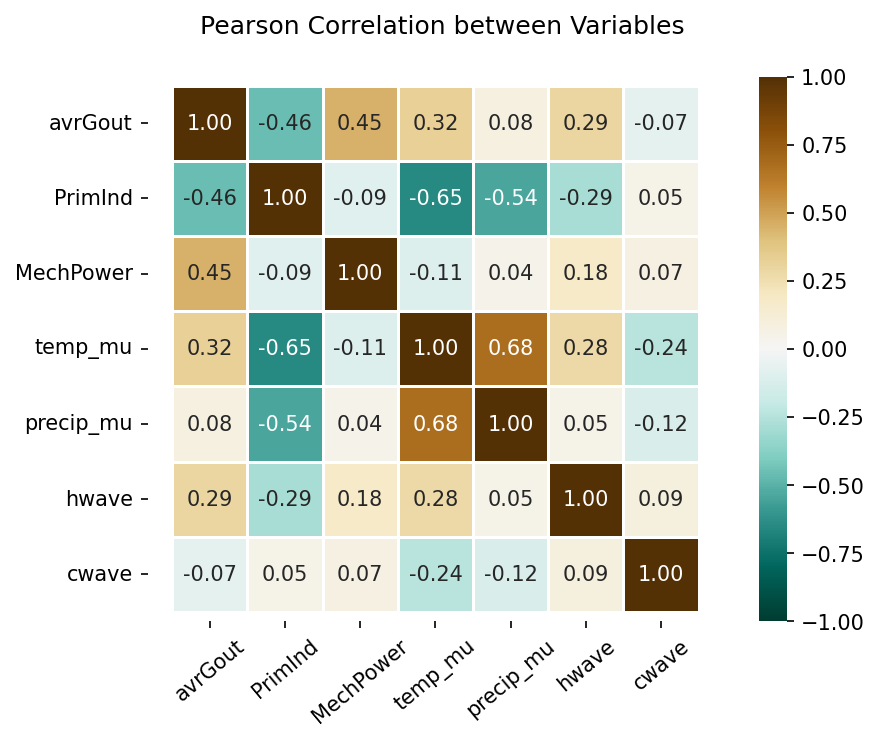

In [21]:
vfig, vax = plt.subplots(figsize=(6,5), dpi=150)

sn.heatmap(multi.drop(['Province','TGrainOut','Case','YEAR','dt', 'SownArea'],axis=1).corr(), cmap='PiYG_r', annot=True,fmt=".2f", ax=vax, linewidth=.5, vmin=-1, vmax=1, cbar_kws={'location':'right', 'shrink':1})
vfig.suptitle('Pearson Correlation between Variables')
vax.set_xticklabels(vax.get_xticklabels(), rotation = 40)
vax.set_yticklabels(vax.get_yticklabels(), rotation = 0)
vax.axis('equal')
vfig.tight_layout()
plt.gca()

In [22]:
olsresid=pd.DataFrame()

# kt/khectare Correlation by Province

In [23]:
from scipy.stats import shapiro
import statsmodels.api as sm

def optimize(t_size, setval, key, a, b, c, npass=0, sresval=True):
            
        state=0
        passcount=0
        
        from sklearn.model_selection import train_test_split
        from sklearn.linear_model import LinearRegression
        
        while(True):
            X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=t_size, random_state=state)

            regressor = LinearRegression()
            regressor.fit(X_train, y_train)

            if regressor.score(X_test, y_test)>0.7:
                        if regressor.coef_[key]<0:
                            if regressor.coef_[a]>-0.1:
                                if regressor.coef_[b]>0:
                                    if regressor.coef_[c]>0:
                                        
                                        if sresval:
                                            y_t_predict=regressor.predict(X_train)
                                            y_pred=regressor.predict(X_test)
                                            from sklearn.metrics import max_error
                                            if max_error(y_train, y_t_predict)<setval and max_error(y_test, y_pred)<setval:
                                                res=y-regressor.predict(X)
                                            
                                                if(shapiro(res).pvalue<0.10):
                                                    if(passcount<npass):
                                                            passcount+=1

                                                    else:
                                                        print(state)
                                                        return state
                                                
                                            
                                        else:
                                            res=y-regressor.predict(X)
                                            
                                            if(shapiro(res).pvalue<0.10):
                                                if(passcount<npass):
                                                        passcount+=1
                                            
                                                else:
                                                    print(state)
                                                    return state
            state+=1

In [24]:
rp=pd.DataFrame()

In [25]:
Ctr='cadetblue'
Cte='cadetblue'
Cln='#777777'
Cln_light='#666666'
cmap=['#2f9147','#2f9158','#2f9170','#2f9989','#2f8191','#2f6491']
plcolor='dimgrey'

plt.style.use('seaborn-v0_8-whitegrid')

Text(0.07, 0.5, 'Per-Hectare Grain Output [t·ha$^{-1}$]')

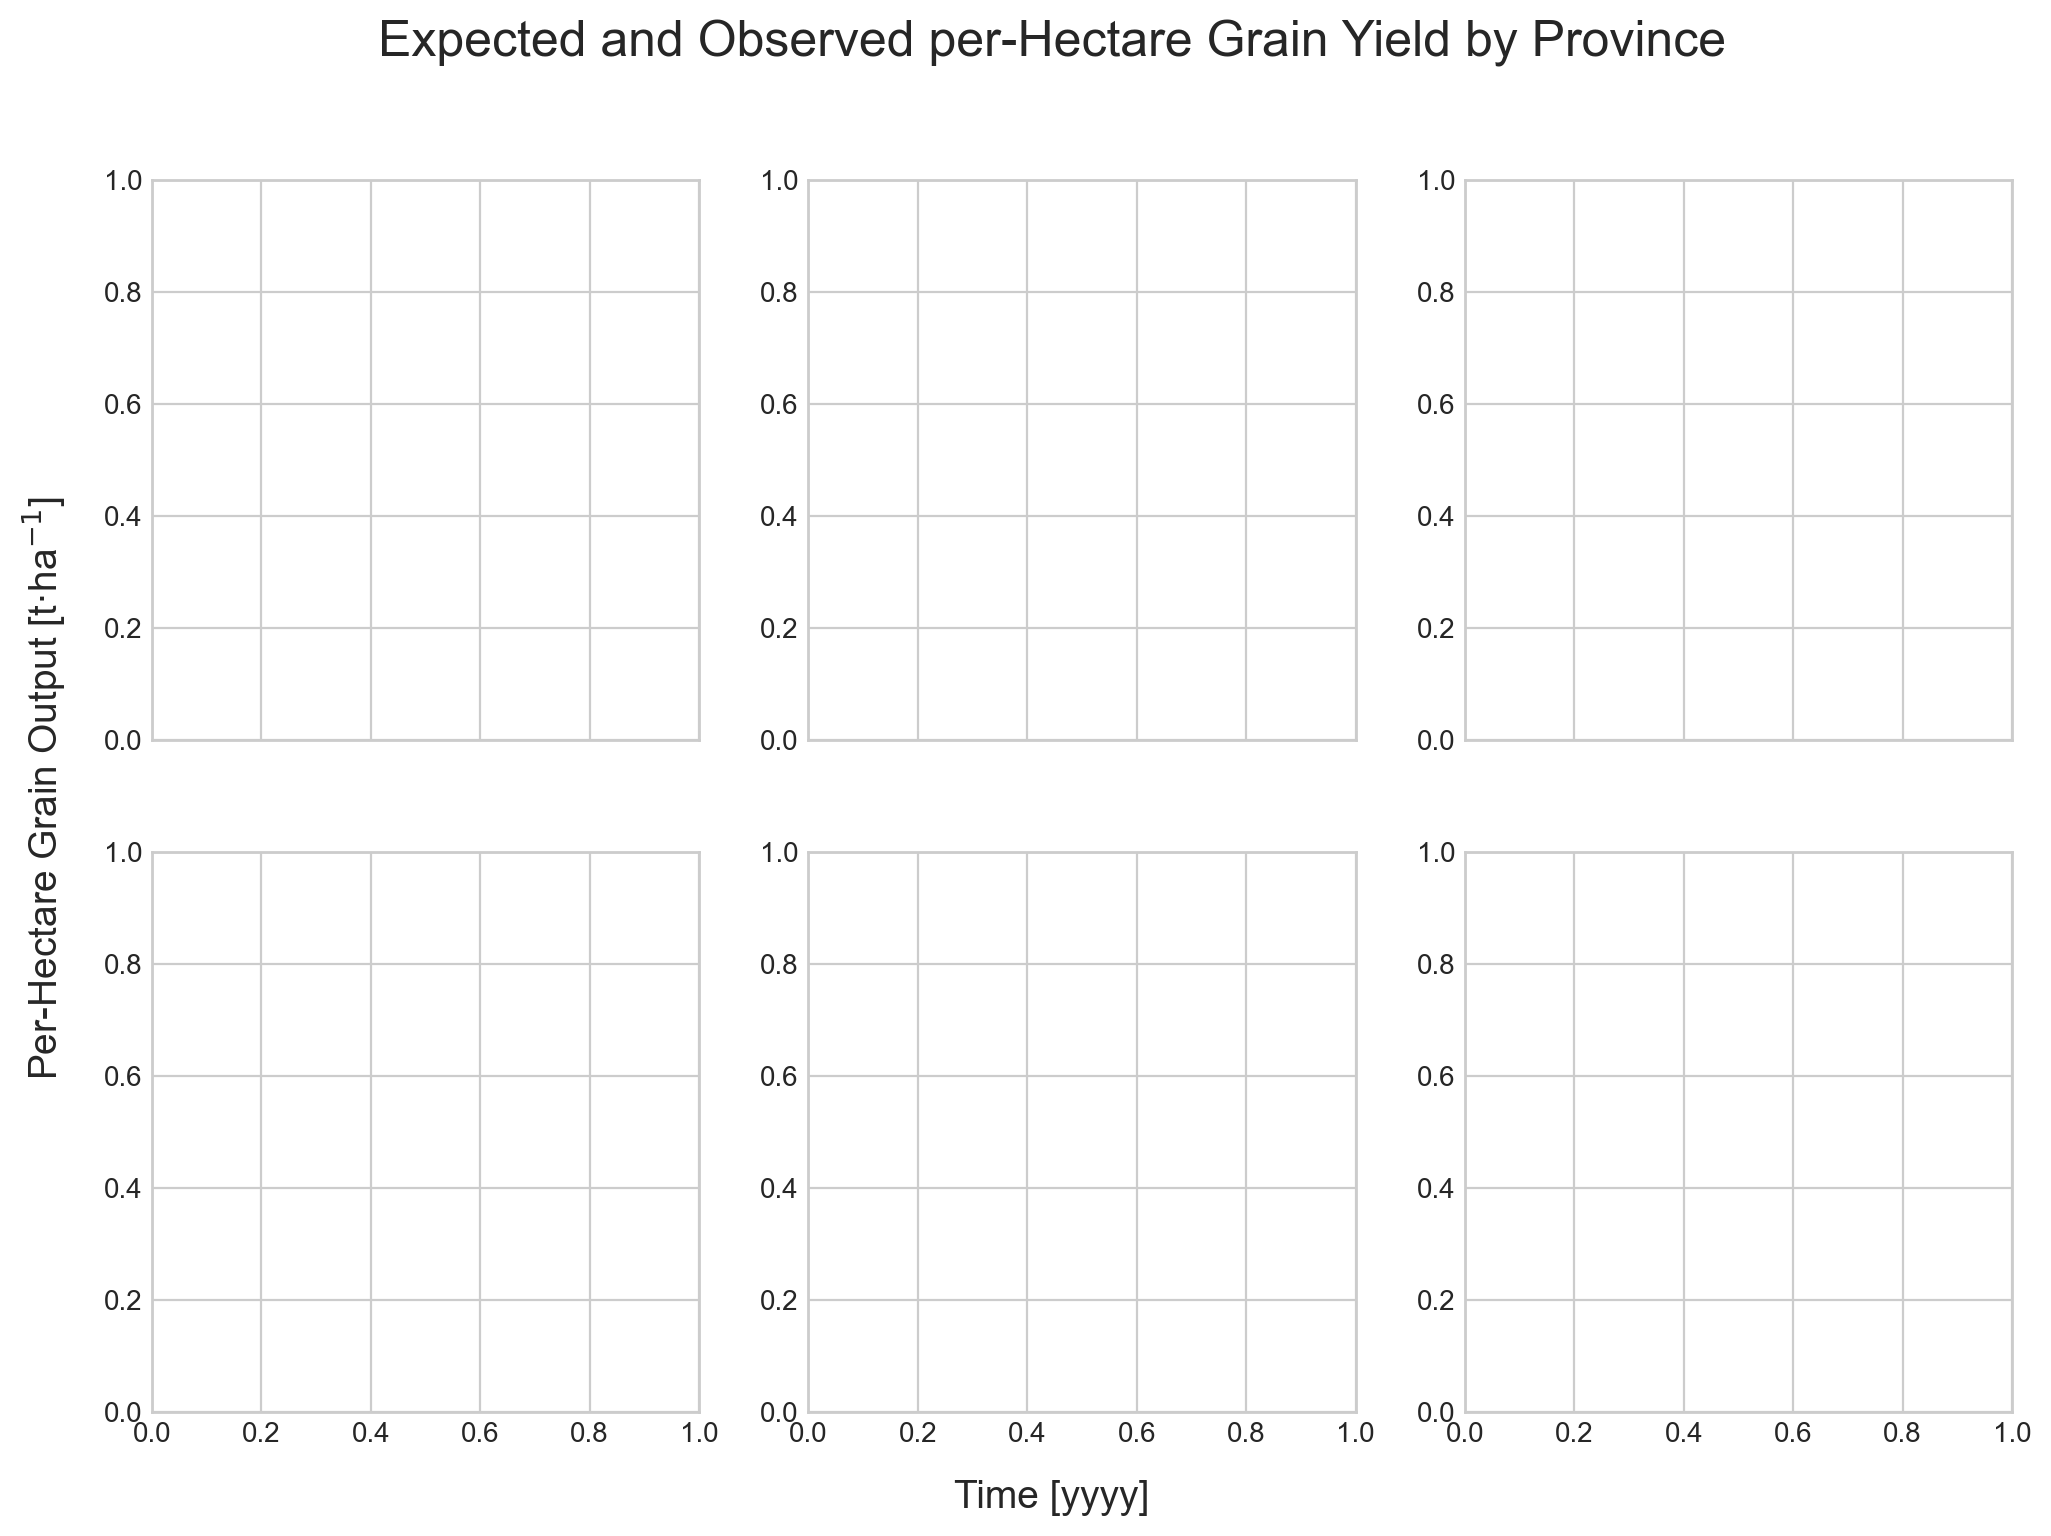

In [26]:
r_f, r_ax = plt.subplots(2,3, figsize=(12,8), dpi=200, sharex=True)
r_f.suptitle('Expected and Observed per-Hectare Grain Yield by Province', fontsize=18)
r_f.text(0.5, 0.05, 'Time [yyyy]', ha='center', fontsize=14)
r_f.text(0.07, 0.5, 'Per-Hectare Grain Output [t·ha$^{-1}$]', va='center', rotation='vertical', fontsize=14)

In [27]:
er=[]
from scipy.linalg import inv

## Jiangsu

Units:
- Average Grain Yield: kt/khectare
- Temperature: degC
- Precipitation: mm
- PrimInd: kpeople

- Mechpower: MW
- Hwave/Cwave: ncase

In [28]:
JSldf

,avrGout,PrimInd,MechPower,dt,temp_mu,precip_mu,hwave,cwave
0,1.635081,10.081320,9.905870,0,15.821265,1101.273438,5.121951,5.170732
1,1.587969,10.088173,9.886652,1,14.992140,1283.557736,1.804878,4.170732
2,1.681273,10.059606,9.911490,2,15.185333,716.267006,2.829268,4.707317
3,1.693646,10.011472,9.943549,3,14.928020,894.937976,1.829268,3.951220
4,1.692728,9.967237,9.981097,4,16.210080,563.442740,4.439024,1.926829
5,1.742252,9.931628,10.010973,5,15.465534,610.751096,4.439024,5.024390
6,1.777450,9.910493,10.042131,6,15.190739,852.121380,3.243902,6.487805
7,1.782579,9.894215,10.126507,7,15.852873,646.228754,4.682927,4.829268
8,1.748035,9.876368,10.163861,8,16.276486,1047.097942,3.560976,3.341463
9,1.809310,9.856731,10.228426,9,15.656726,958.307165,2.439024,4.365854


In [107]:
#separating independent and dependent variable
X = JSldf.dropna().iloc[:,1:].values
y = JSldf.dropna().iloc[:,0].values

#s = optimize(0.8,0.1,3,0,1,2,npass=0)
#21 26

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=2171)

from sklearn.linear_model import LinearRegression
jsreg = LinearRegression()
jsreg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = jsreg.predict(X_test)
yt_pred = jsreg.predict(X_train)
yall_pred = jsreg.predict(X)

#Revised OLS

model=sm.OLS(y, X).fit()

#FGLS

residual = (y - model.predict(X))
olsresid['Jiangsu'] = residual

n = len(residual)
covariance_matrix = np.dot(residual.reshape(-1, 1), residual.reshape(1, -1)) / n

# Using the absolute values of the residuals to construct the weights
regularization_strength = 1e-6
covariance_matrix += np.eye(covariance_matrix.shape[0]) * regularization_strength
weights = np.linalg.inv(covariance_matrix)
model_fgls = sm.GLS(y, X, sigma=covariance_matrix).fit()
print(model_fgls.summary())
js_fgls=model_fgls

# Getting the predicted values from the model
y_pred = model_fgls.predict(X)

# Getting the residuals from the model
residuals = y - y_pred
rp['Jiangsu']=residuals

#RMSE of prediction

from sklearn.metrics import mean_squared_error

er.append(mean_squared_error(y, y_pred))

In [108]:
jsreg.coef_

array([ 1.58737836e-02,  1.71699321e-01,  3.74030548e-03, -3.84662328e-03,
       -4.87929307e-05, -3.13370838e-03, -9.46291589e-03])

In [115]:
#Revised OLS

model=sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.327e+04
Date:                Fri, 24 Nov 2023   Prob (F-statistic):                    5.42e-43
Time:                        14:46:19   Log-Likelihood:                          67.424
No. Observations:                  32   AIC:                                     -120.8
Df Residuals:                      25   BIC:                                     -110.6
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1273      0.118      1.079      0.291      -0.116       0.370
x2             0.0054      0.131      0.041      0.967      -0.264       0.275
x3             0.0137      0.010      1.408      0.171      -0.006       0.034
x4             0.0269      0.027      0.991      0.331      -0.029       0.083
x5         -9.281e-05   3.27e-05     -2.839      0.009      -0.000   -2.55e-05
x6            -0.0068      0.008     -0.891      0.382      -0.022       0.009
x7             0.0008      0.007      0.111      0.912      -0.014       0.016
==============================================================================
Omnibus:                        3.752   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                2.567
Skew:                          -0.316   Prob(JB):                        0.277
Kurtosis:                       4.235   Cond. No.                     3.04e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
#FGLS

residual = (y - model.predict(X))
olsresid['Jiangsu'] = residual

n = len(residual)
covariance_matrix = np.dot(residual.reshape(-1, 1), residual.reshape(1, -1)) / n

# Using the absolute values of the residuals to construct the weights
regularization_strength = 1e-6
covariance_matrix += np.eye(covariance_matrix.shape[0]) * regularization_strength
weights = np.linalg.inv(covariance_matrix)
model_fgls = sm.GLS(y, X, sigma=covariance_matrix).fit()
print(model_fgls.summary())
js_fgls=model_fgls

# Getting the predicted values from the model
y_pred = model_fgls.predict(X)

# Getting the residuals from the model
residuals = y - y_pred
rp['Jiangsu']=residuals

#RMSE of prediction

from sklearn.metrics import mean_squared_error

er.append(mean_squared_error(y, y_pred))

                                 GLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            GLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.150e+07
Date:                Fri, 24 Nov 2023   Prob (F-statistic):                    1.03e-79
Time:                        14:45:30   Log-Likelihood:                          172.28
No. Observations:                  32   AIC:                                     -330.6
Df Residuals:                      25   BIC:                                     -320.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [32]:
pd.DataFrame(model_fgls.bse)

,0
0,0.004111
1,0.004616
2,0.000340
3,0.000954
4,0.000001
5,0.000261
6,0.000260


In [33]:
# Getting the predicted values from the model
y_pred = model_fgls.predict(X)

# Getting the residuals from the model
residuals = y - y_pred
rp['Jiangsu']=residuals

In [34]:
#RMSE of prediction

from sklearn.metrics import mean_squared_error

er.append(mean_squared_error(y, y_pred))

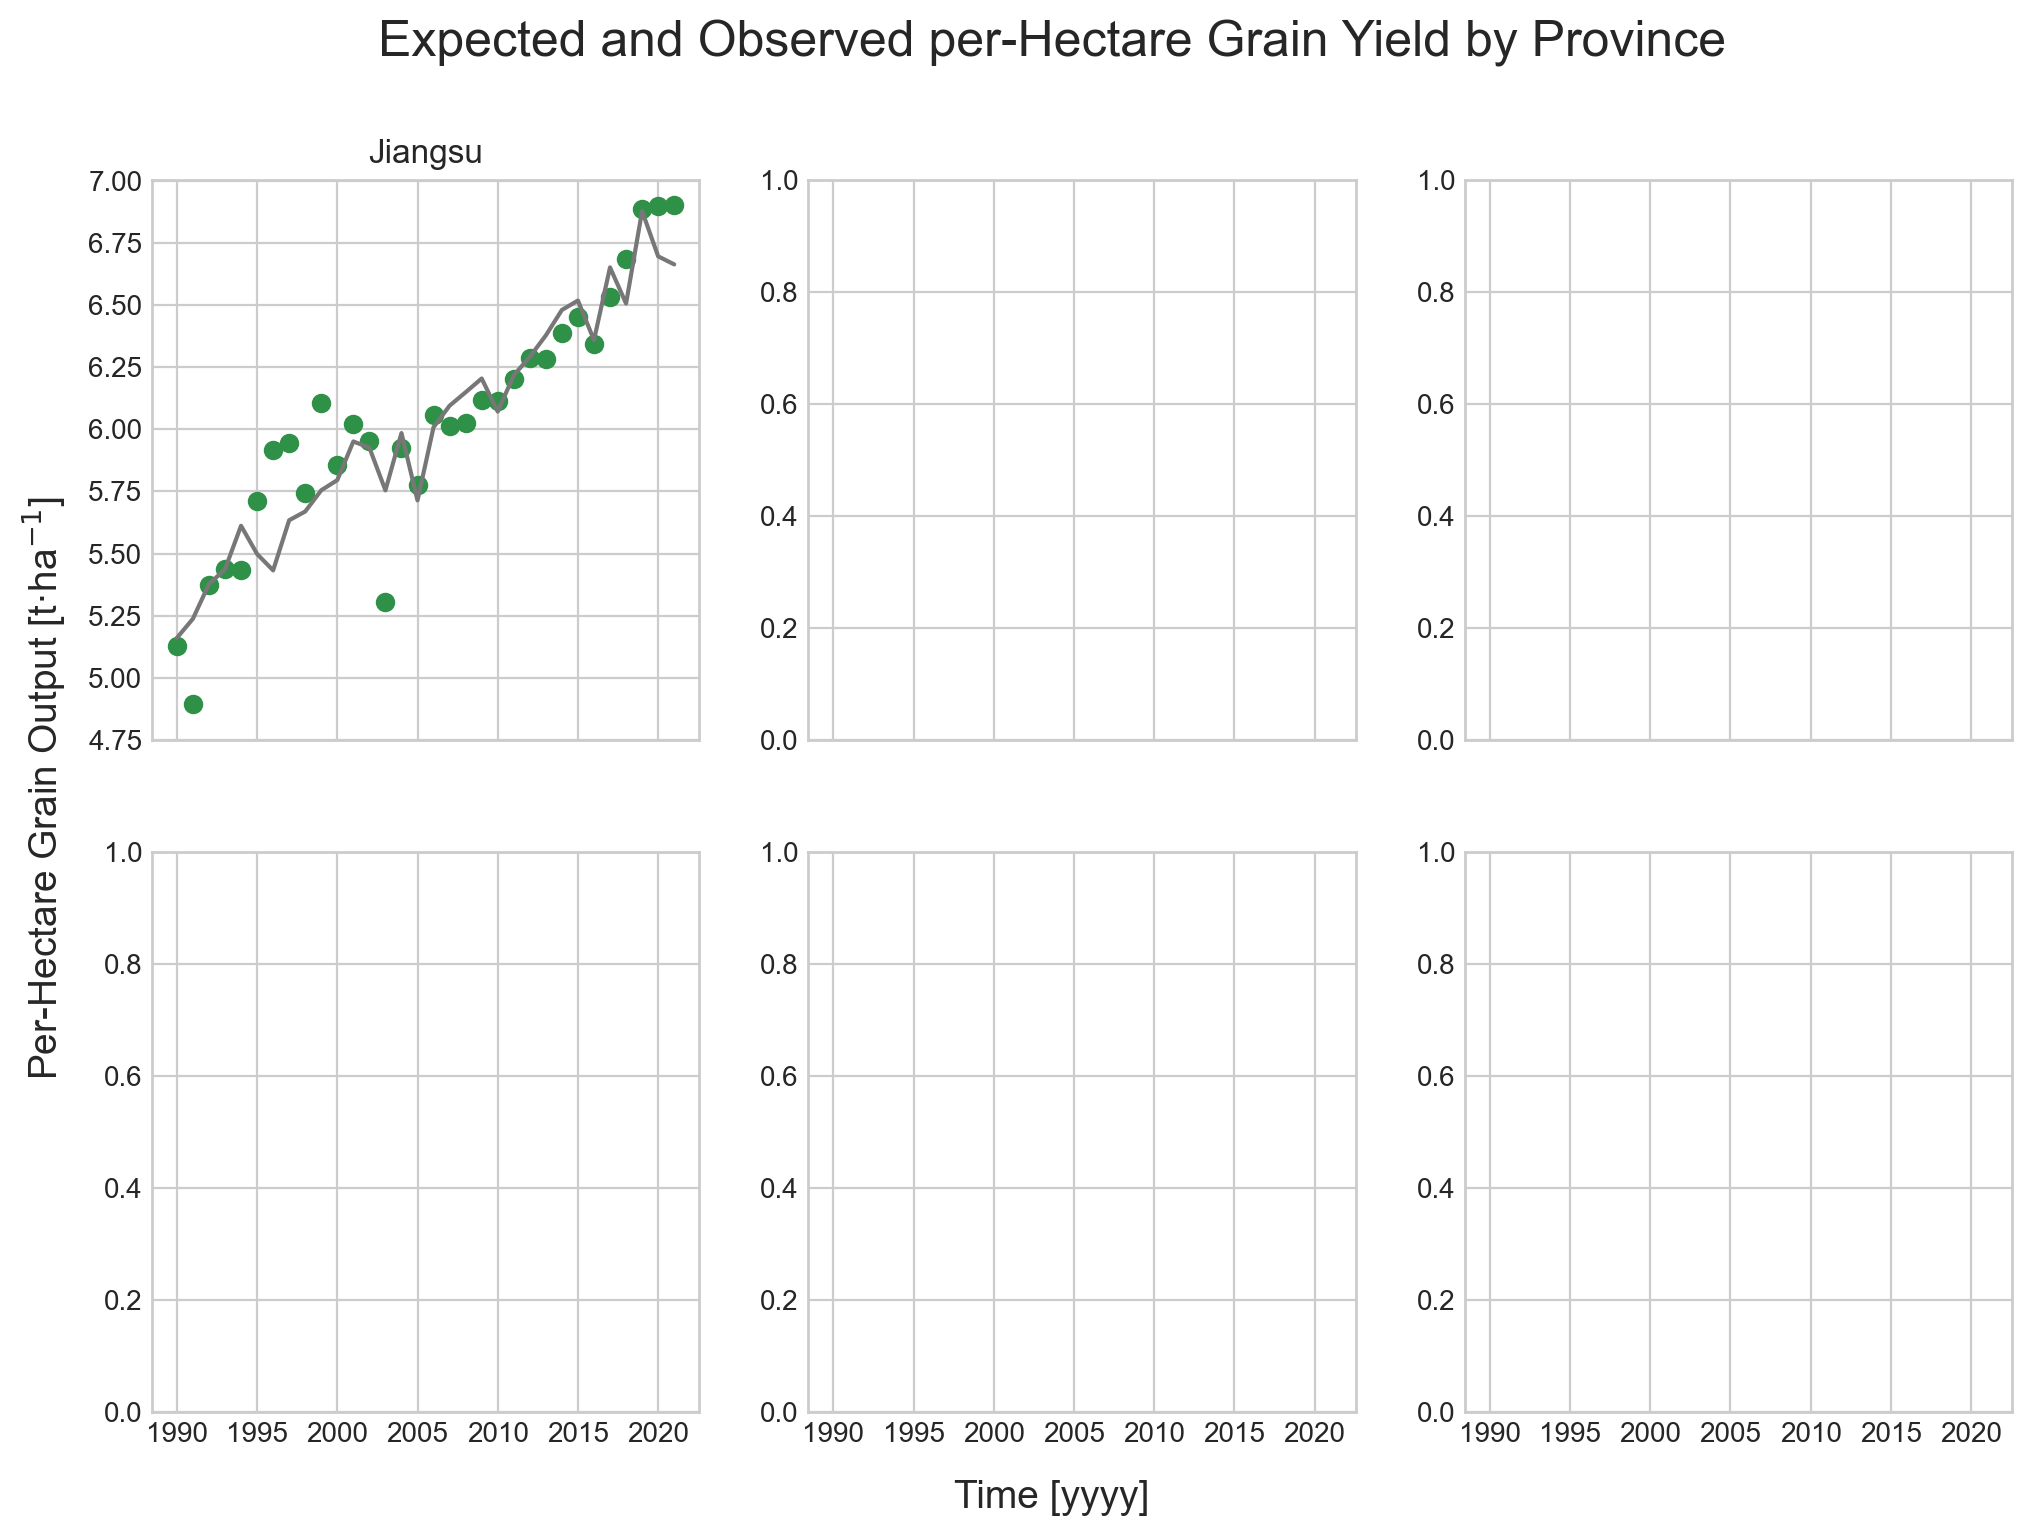

In [35]:
r_ax[0,0].scatter(X_train[:,2]+1990,np.exp(y_train),c=cmap[0])
r_ax[0,0].scatter(X_test[:,2]+1990,np.exp(y_test),c=cmap[0])
#r_ax[0,0].plot(X[:,2]+1990, np.exp(yall_pred), c=Cln_light)
r_ax[0,0].plot(X[:,2]+1990, np.exp(model_fgls.predict(X)), c=Cln)
r_ax[0,0].set_title('Jiangsu')
r_ax[0,0].set_xticks(np.arange(1990,2025, 5))
r_ax[0,0].set_yticks(np.arange(4.75, 7.1, 0.25))

r_f

## Zhejiang

In [36]:
ZJldf

,avrGout,PrimInd,MechPower,dt,temp_mu,precip_mu,hwave,cwave
0,1.580297,9.516560,9.405685,0,17.111979,1665.191406,4.222222,4.361111
1,1.613345,9.522952,9.445776,1,16.632704,1191.543186,4.583333,3.916667
2,1.591195,9.517450,9.511948,2,16.496039,1395.331597,3.027778,5.111111
3,1.619199,9.432059,9.559503,3,16.583388,1341.369141,2.611111,4.777778
4,1.633573,9.387281,9.614031,4,17.486844,1178.977648,5.166667,2.666667
5,1.626143,9.351970,9.704915,5,16.825195,1245.627821,4.750000,5.000000
6,1.662361,9.331974,9.745423,6,16.991699,1060.395399,4.777778,7.694444
7,1.648371,9.317642,9.760367,7,17.333496,1322.121962,2.416667,4.055556
8,1.634445,9.313628,9.797460,8,18.170247,1536.229167,4.500000,3.333333
9,1.621721,9.285596,9.858752,9,17.471625,1649.650499,2.500000,4.027778


In [37]:
#separating independent and dependent variable
X = ZJldf.dropna().iloc[:,1:].values
y = ZJldf.dropna().iloc[:,0].values

#s = optimize(0.8,0.1,3,0,1,2,npass=10)
#10
#print(s)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=2620)

from sklearn.linear_model import LinearRegression
zjreg = LinearRegression()
zjreg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = zjreg.predict(X_test)
yt_pred = zjreg.predict(X_train)
yall_pred = zjreg.predict(X)

In [38]:
#FGLS

residual = (y - yall_pred)
olsresid['Zhejiang'] = residual 

n = len(residual)
covariance_matrix = np.dot(residual.reshape(-1, 1), residual.reshape(1, -1)) / n

regularization_strength = 1e-6
covariance_matrix += np.eye(covariance_matrix.shape[0]) * regularization_strength
weights = np.linalg.inv(covariance_matrix)
model_fgls = sm.GLS(y, X, sigma=covariance_matrix).fit()
print(model_fgls.summary())
zj_fgls=model_fgls

                                 GLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            GLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.175e+05
Date:                Fri, 24 Nov 2023   Prob (F-statistic):                    7.91e-55
Time:                        13:41:22   Log-Likelihood:                          100.42
No. Observations:                  32   AIC:                                     -186.8
Df Residuals:                      25   BIC:                                     -176.6
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [39]:
# Getting the predicted values from the model
y_pred = model_fgls.predict(X)

# Getting the residuals from the model
residuals = y - y_pred
rp['Zhejiang']=residuals

In [40]:
pd.DataFrame(model_fgls.bse)

,0
0,0.061365
1,0.054519
2,0.004766
3,0.006881
4,0.000009
5,0.001876
6,0.001866


In [41]:
#RMSE of prediction

from sklearn.metrics import mean_squared_error

er.append(mean_squared_error(y, y_pred))


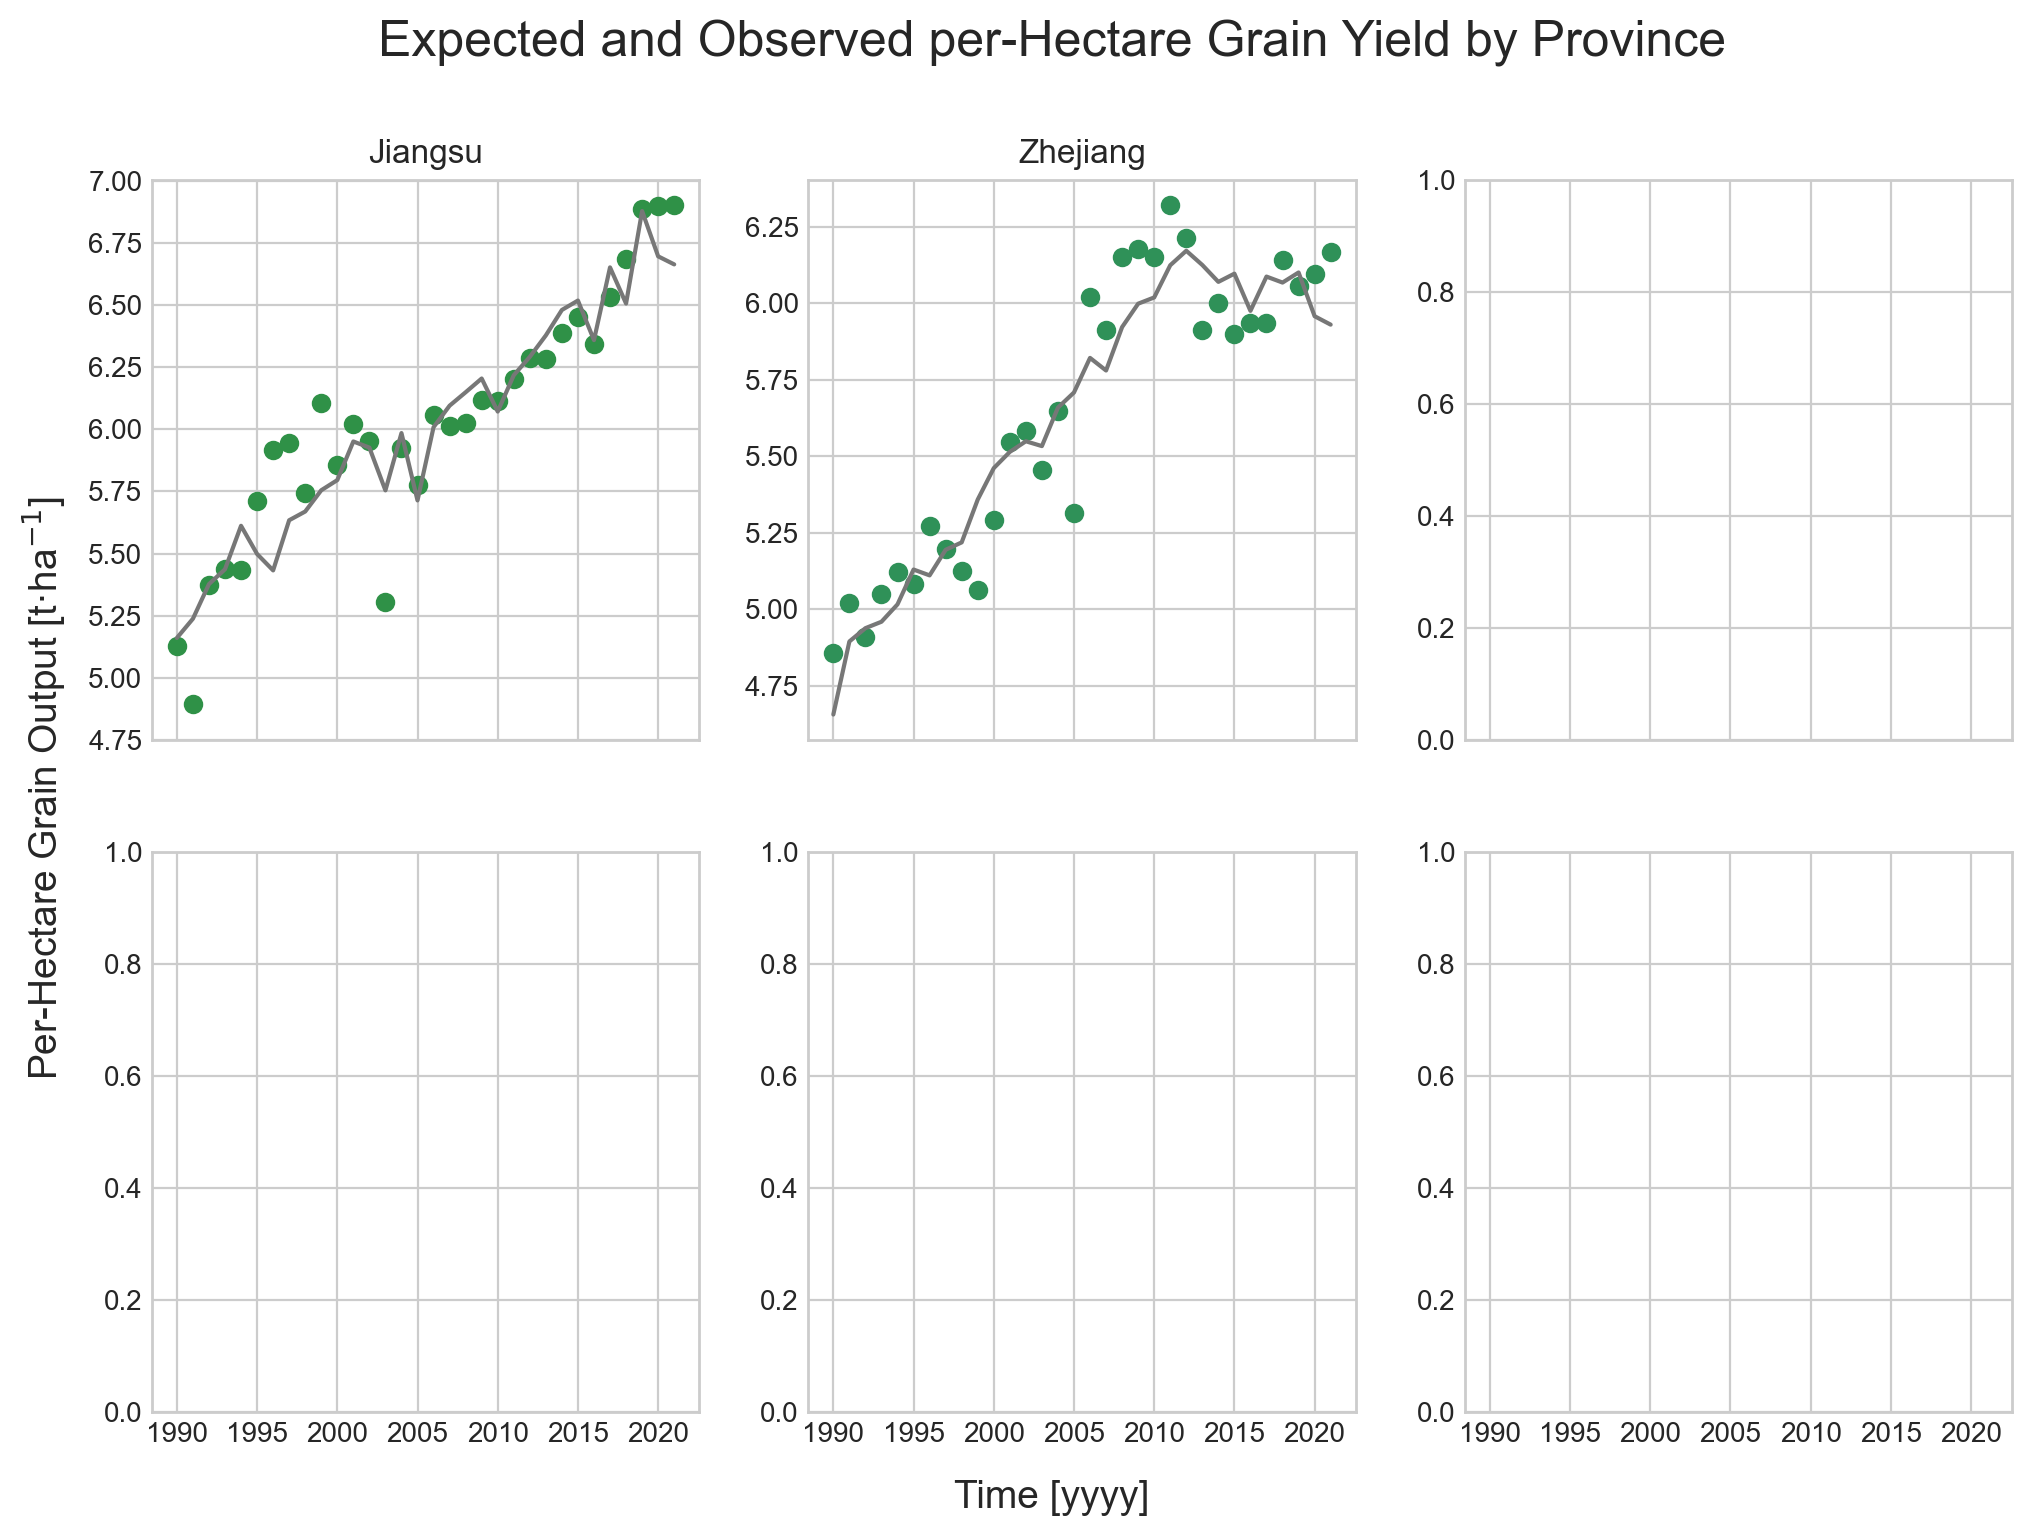

In [42]:
r_ax[0,1].scatter(X_train[:,2]+1990,np.exp(y_train),c=cmap[1])
r_ax[0,1].scatter(X_test[:,2]+1990,np.exp(y_test),c=cmap[1])
#r_ax[0,1].plot(X[:,2]+1990, np.exp(yall_pred), c=Cln_light)
r_ax[0,1].plot(X[:,2]+1990, np.exp(model_fgls.predict(X)), c=Cln)
r_ax[0,1].set_title('Zhejiang')
r_ax[0,1].set_xticks(np.arange(1990,2025, 5))
#r_ax[0,1].set_yticks(np.arange(4.75,7.1, 0.25))

r_f

## Anhui

In [43]:
AHldf

,avrGout,PrimInd,MechPower,dt,temp_mu,precip_mu,hwave,cwave
0,1.394938,9.874934,9.478075,0,15.765663,1235.668795,4.942308,4.673077
1,1.077564,9.898776,9.532569,1,14.917931,1535.319862,2.307692,3.365385
2,1.383191,9.910016,9.583351,2,15.193622,933.264273,3.403846,5.057692
3,1.448346,9.884203,9.650014,3,14.856070,1172.983023,2.153846,4.442308
4,1.391328,9.863759,9.731251,4,16.053429,843.831055,4.442308,2.807692
5,1.511313,9.875757,9.817930,5,15.540546,942.705153,4.250000,5.692308
6,1.501748,9.887663,9.911952,6,15.181415,1203.861779,3.384615,6.846154
7,1.536322,9.893033,10.016647,7,15.789551,958.193810,4.057692,4.634615
8,1.464111,9.907380,10.145092,8,16.287504,1309.228065,3.826923,3.980769
9,1.541024,9.907729,10.227804,9,15.690167,1354.797326,3.423077,4.192308


In [44]:
#separating independent and dependent variable
X = AHldf.dropna().iloc[:,1:].values
y = AHldf.dropna().iloc[:,0].values

#s = 1
#print(s)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=1)

from sklearn.linear_model import LinearRegression
ahreg = LinearRegression()
ahreg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = ahreg.predict(X_test)
yt_pred = ahreg.predict(X_train)
yall_pred = ahreg.predict(X)

In [45]:
#FGLS

residual = (y - yall_pred)
olsresid['Anhui'] = residual 

n = len(residual)
covariance_matrix = np.dot(residual.reshape(-1, 1), residual.reshape(1, -1)) / n

regularization_strength = 1e-6
covariance_matrix += np.eye(covariance_matrix.shape[0]) * regularization_strength
weights = np.linalg.inv(covariance_matrix)
model_fgls = sm.GLS(y, X, sigma=covariance_matrix).fit()
print(model_fgls.summary())
ah_fgls=model_fgls

                                 GLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            GLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.032e+04
Date:                Fri, 24 Nov 2023   Prob (F-statistic):                    5.04e-49
Time:                        13:41:23   Log-Likelihood:                          85.874
No. Observations:                  32   AIC:                                     -157.7
Df Residuals:                      25   BIC:                                     -147.5
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [46]:
# Getting the predicted values from the model
y_pred = model_fgls.predict(X)

# Getting the residuals from the model
residuals = y - y_pred
rp['Anhui']=residuals

In [47]:
pd.DataFrame(model_fgls.bse)

,0
0,0.037290
1,0.035454
2,0.002775
3,0.008977
4,0.000016
5,0.003356
6,0.002978


In [48]:
#RMSE of prediction

from sklearn.metrics import mean_squared_error

er.append(mean_squared_error(y, y_pred))


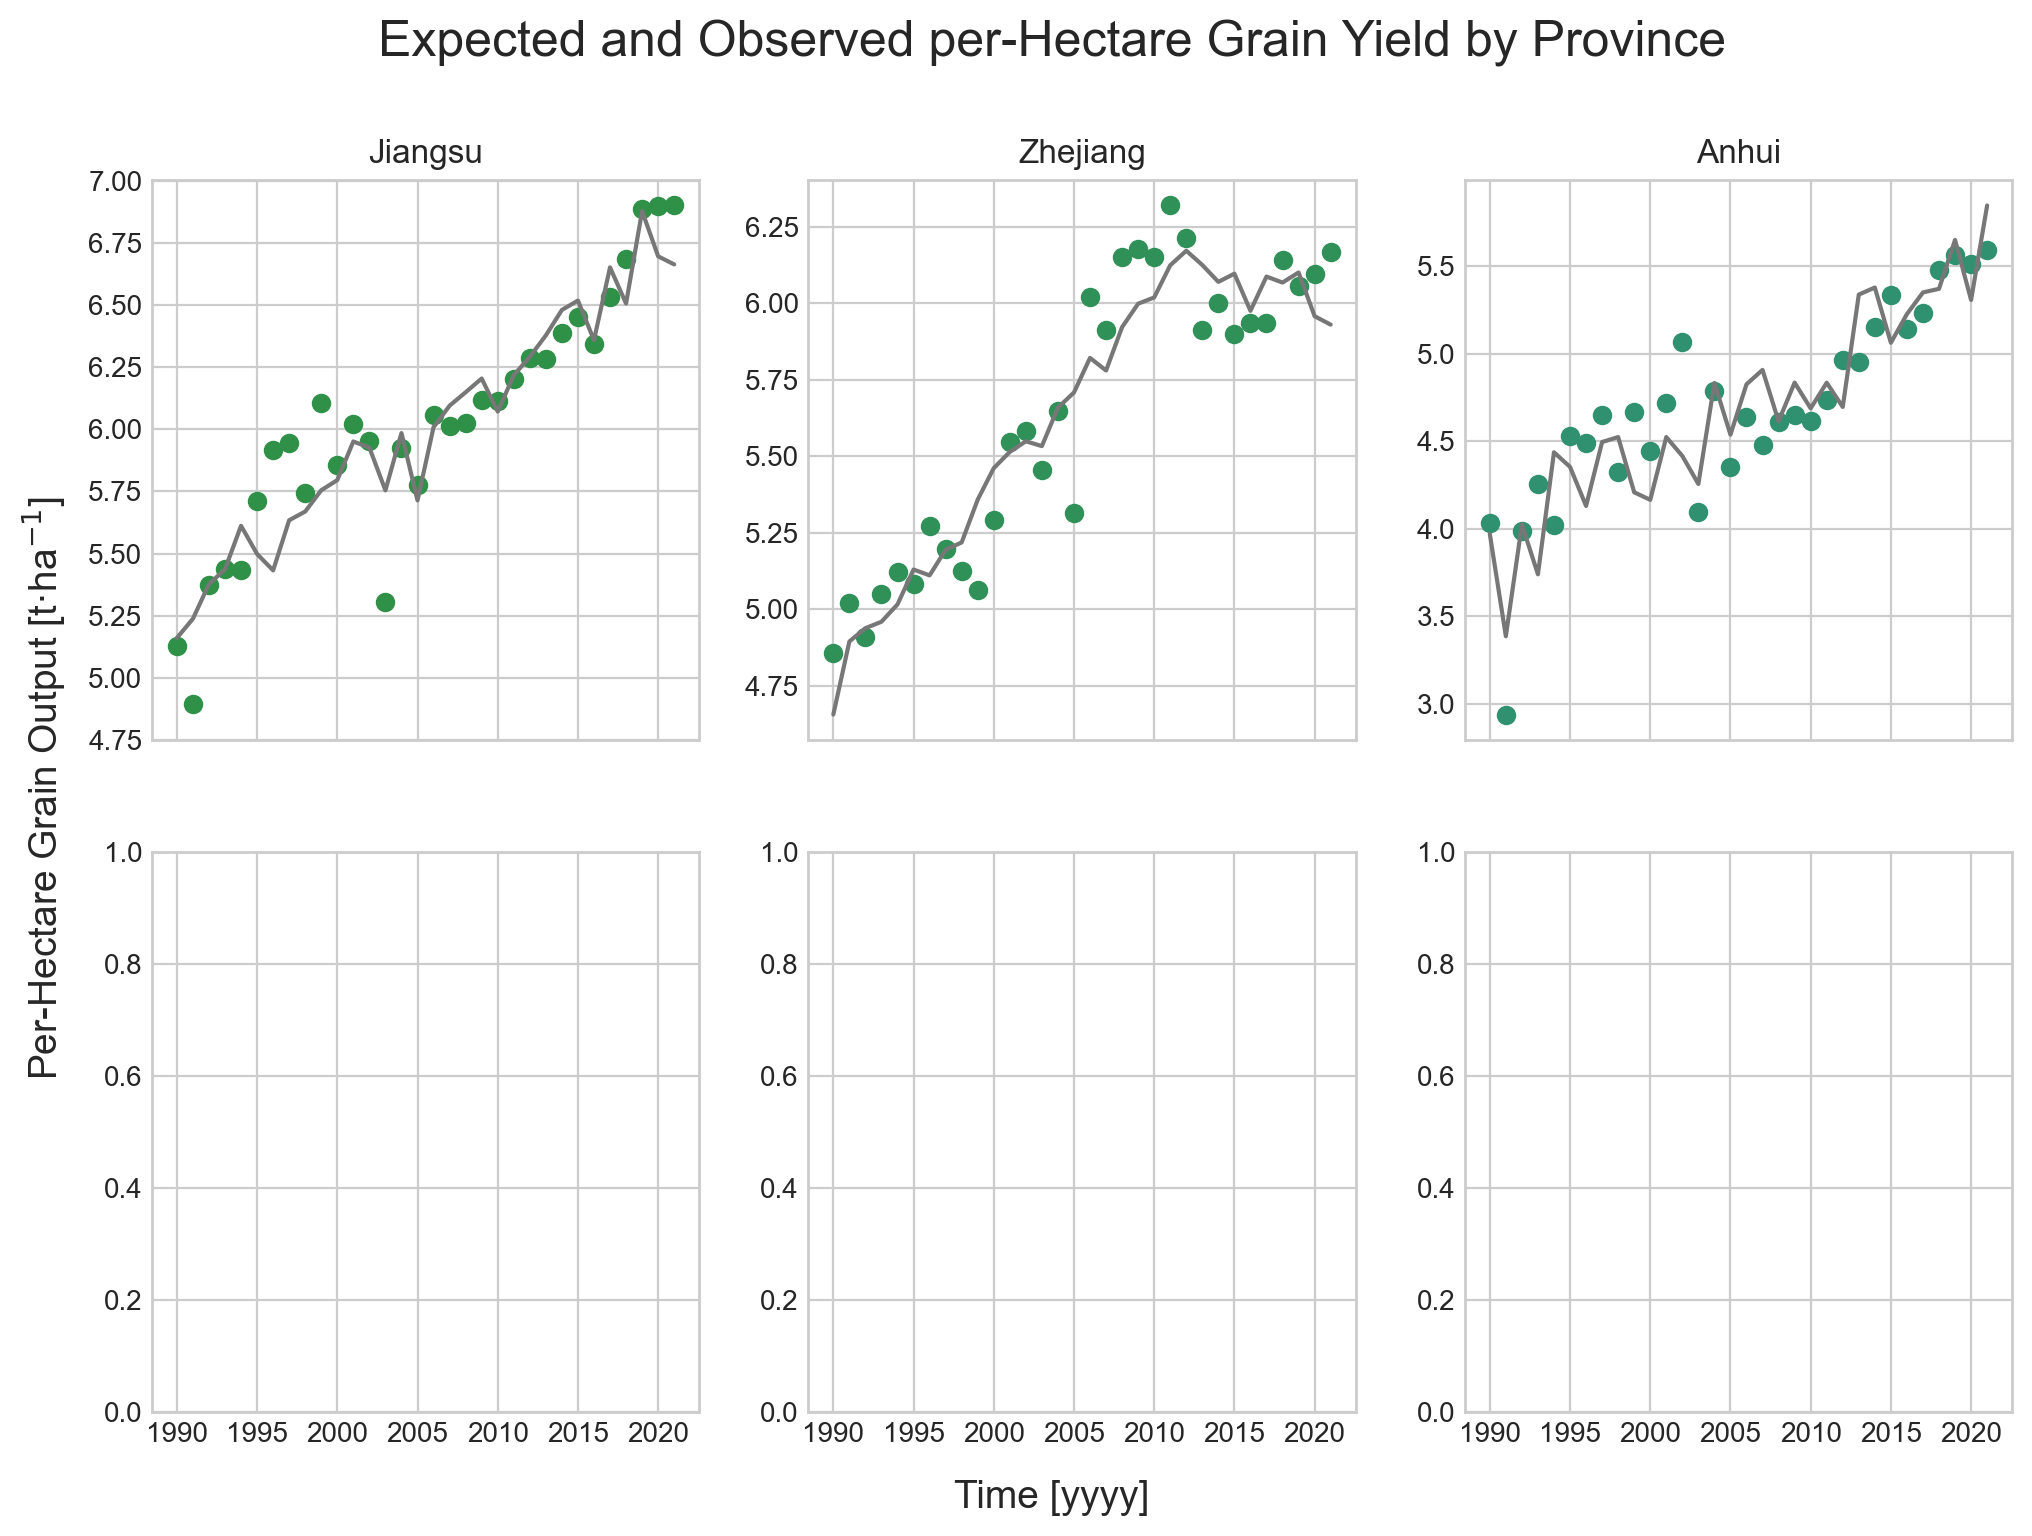

In [49]:
r_ax[0,2].scatter(X_train[:,2]+1990,np.exp(y_train),c=cmap[2])
r_ax[0,2].scatter(X_test[:,2]+1990,np.exp(y_test),c=cmap[2])
#r_ax[0,2].plot(X[:,2]+1990, np.exp(yall_pred), c=Cln_light)
r_ax[0,2].plot(X[:,2]+1990, np.exp(model_fgls.predict(X)), c=Cln)
r_ax[0,2].set_title('Anhui')
r_ax[0,2].set_xticks(np.arange(1990,2025, 5))
#r_ax[0,0].set_yticks(np.arange(4.5,7.6, 0.25))

r_f

## Jiangxi

In [50]:
JXldf

,avrGout,PrimInd,MechPower,dt,temp_mu,precip_mu,hwave,cwave
0,1.499742,9.386895,8.806454,0,18.207992,1632.105533,4.114754,4.295082
1,1.510455,9.412628,8.808713,1,17.980309,1304.783811,4.803279,2.426230
2,1.513838,9.381095,8.755548,2,17.963467,1529.385502,3.557377,3.344262
3,1.507415,9.292750,8.748940,3,17.762423,1519.525102,2.770492,4.213115
4,1.540932,9.330077,8.770004,4,18.263672,1560.501793,3.901639,2.032787
5,1.521587,9.279587,8.799481,5,17.989530,1420.780353,3.508197,5.377049
6,1.598738,9.258845,8.841196,6,17.938909,1243.996414,2.278689,6.606557
7,1.595088,9.211240,8.922658,7,18.172932,1672.469006,0.442623,3.311475
8,1.514420,9.185535,8.979543,8,18.982806,1821.470799,4.737705,3.114754
9,1.585826,9.179159,9.051345,9,18.428439,1836.457608,2.442623,4.016393


In [51]:
#separating independent and dependent variable
X = JXldf.dropna().iloc[:,1:].values
y = JXldf.dropna().iloc[:,0].values

#s = optimize(0.8,0.1,3,0,1,2,npass=2)
#21 26
#print(s)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=22)

from sklearn.linear_model import LinearRegression
jxreg = LinearRegression()
jxreg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = jxreg.predict(X_test)
yt_pred = jxreg.predict(X_train)
yall_pred = jxreg.predict(X)

In [52]:
#FGLS

residual = (y - yall_pred)
olsresid['Jiangxi'] = residual 

n = len(residual)
covariance_matrix = np.dot(residual.reshape(-1, 1), residual.reshape(1, -1)) / n

regularization_strength = 1e-6
covariance_matrix += np.eye(covariance_matrix.shape[0]) * regularization_strength
weights = np.linalg.inv(covariance_matrix)
model_fgls = sm.GLS(y, X, sigma=covariance_matrix).fit()
print(model_fgls.summary())
jx_fgls=model_fgls

                                 GLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            GLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.527e+05
Date:                Fri, 24 Nov 2023   Prob (F-statistic):                    5.48e-59
Time:                        13:41:23   Log-Likelihood:                          114.12
No. Observations:                  32   AIC:                                     -214.2
Df Residuals:                      25   BIC:                                     -204.0
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [53]:
# Getting the predicted values from the model
y_pred = model_fgls.predict(X)

# Getting the residuals from the model
residuals = y - y_pred
rp['Jiangxi']=residuals

In [54]:
pd.DataFrame(model_fgls.bse)

,0
0,0.014355
1,0.006896
2,0.000968
3,0.004992
4,0.000005
5,0.001015
6,0.001128


In [55]:
#RMSE of prediction

from sklearn.metrics import mean_squared_error

er.append(mean_squared_error(y, y_pred))


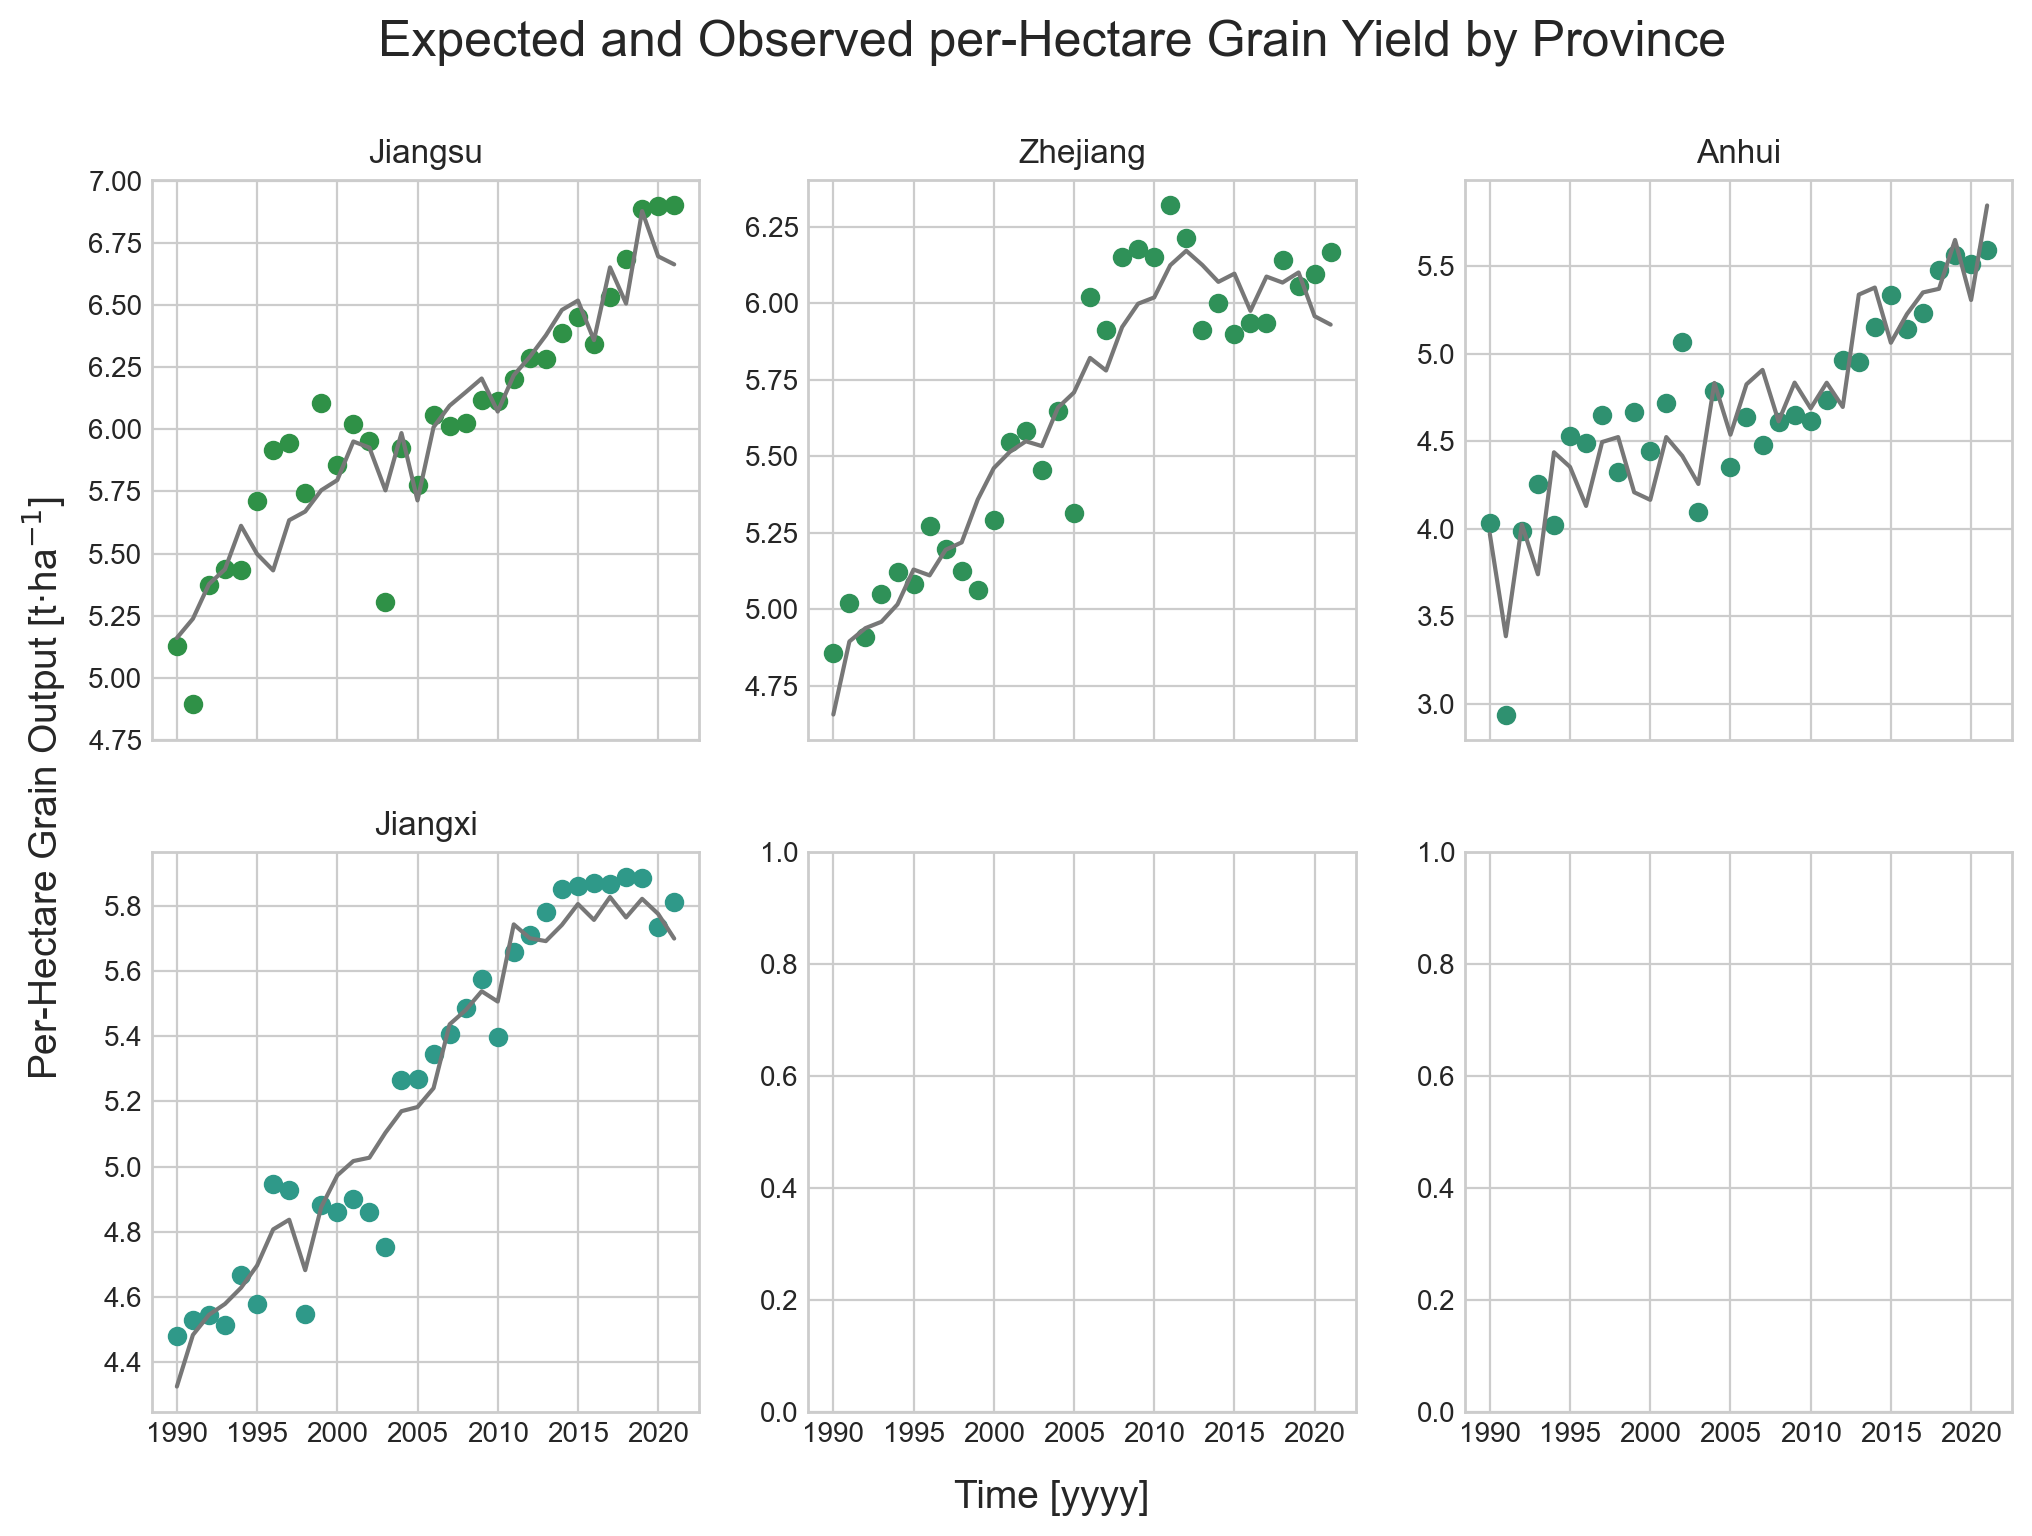

In [56]:
r_ax[1,0].scatter(X_train[:,2]+1990,np.exp(y_train),c=cmap[3])
r_ax[1,0].scatter(X_test[:,2]+1990,np.exp(y_test),c=cmap[3])
#r_ax[1,0].plot(X[:,2]+1990, np.exp(yall_pred), c=Cln_light)
r_ax[1,0].plot(X[:,2]+1990, np.exp(model_fgls.predict(X)), c=Cln)
r_ax[1,0].set_title('Jiangxi')
r_ax[1,0].set_xticks(np.arange(1990,2025, 5))
#r_ax[1,0].set_yticks(np.arange(4.25,6.1, 0.25))

r_f

## Hubei

In [57]:
HBldf

,avrGout,PrimInd,MechPower,dt,temp_mu,precip_mu,hwave,cwave
0,1.560177,9.830809,9.305305,0,15.782878,1153.739149,5.152778,3.722222
1,1.463289,9.850825,9.324490,1,15.488959,1144.133898,3.583333,2.055556
2,1.588608,9.835744,9.324472,2,15.557970,821.451280,5.194444,6.097222
3,1.575483,9.808517,9.313790,3,15.121121,1032.017253,2.083333,5.236111
4,1.619031,9.775938,9.337968,4,15.872287,810.333225,5.625000,3.222222
5,1.640567,9.739202,9.371047,5,15.957981,875.276367,3.763889,5.597222
6,1.627414,9.727406,9.410993,6,15.268283,1098.859375,3.847222,5.944444
7,1.672932,9.719084,9.454102,7,16.013889,824.318359,5.388889,3.638889
8,1.653709,9.688126,9.492432,8,16.739583,1243.973958,5.013889,3.597222
9,1.657615,9.688188,9.520542,9,16.334635,1114.118707,4.861111,3.208333


In [58]:
#separating independent and dependent variable
X = HBldf.dropna().iloc[:,1:].values
y = HBldf.dropna().iloc[:,0].values

#s = optimize(0.8,0.2,3,1,0,0,npass=0)
#21 26
#print(s)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=1810)

from sklearn.linear_model import LinearRegression
hbreg = LinearRegression()
hbreg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = hbreg.predict(X_test)
yt_pred = hbreg.predict(X_train)
yall_pred = hbreg.predict(X)

In [59]:
#FGLS

residual = (y - yall_pred)
olsresid['Hubei'] = residual 

n = len(residual)
covariance_matrix = np.dot(residual.reshape(-1, 1), residual.reshape(1, -1)) / n

regularization_strength = 1e-6
covariance_matrix += np.eye(covariance_matrix.shape[0]) * regularization_strength
weights = np.linalg.inv(covariance_matrix)
model_fgls = sm.GLS(y, X, sigma=covariance_matrix).fit()
print(model_fgls.summary())
hb_fgls=model_fgls

                                 GLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            GLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.552e+04
Date:                Fri, 24 Nov 2023   Prob (F-statistic):                    1.98e-52
Time:                        13:41:24   Log-Likelihood:                          94.418
No. Observations:                  32   AIC:                                     -174.8
Df Residuals:                      25   BIC:                                     -164.6
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [60]:
# Getting the predicted values from the model
y_pred = model_fgls.predict(X)

# Getting the residuals from the model
residuals = y - y_pred
rp['Hubei']=residuals

In [61]:
pd.DataFrame(model_fgls.bse)

,0
0,0.024241
1,0.023599
2,0.001891
3,0.007903
4,0.000014
5,0.002211
6,0.002527


In [62]:
#RMSE of prediction

from sklearn.metrics import mean_squared_error

er.append(mean_squared_error(y, y_pred))


In [63]:
r_ax[1,2].scatter(X_train[:,2]+1990,np.exp(y_train),c=cmap[5])
r_ax[1,2].scatter(X_test[:,2]+1990,np.exp(y_test),c=cmap[5])
#r_ax[1,2].plot(X[:,2]+1990, np.exp(yall_pred), c=Cln_light)
r_ax[1,2].plot(X[:,2]+1990, np.exp(model_fgls.predict(X)), c=Cln)
r_ax[1,2].set_title('Hubei')
r_ax[1,2].set_xticks(np.arange(1990,2025, 5))
r_ax[1,2].set_yticks(np.arange(4.2,6.4, 0.2))

## Hunan

In [64]:
HNldf

,avrGout,PrimInd,MechPower,dt,temp_mu,precip_mu,hwave,cwave
0,1.597646,9.988150,9.400275,0,17.387200,1470.862158,5.671233,4.356164
1,1.609214,10.007766,9.449767,1,16.961901,1228.039384,4.493151,2.191781
2,1.608789,10.004879,9.460609,2,17.079409,1183.211473,4.808219,5.520548
3,1.627082,9.971501,9.528321,3,16.725037,1274.435360,2.123288,6.095890
4,1.656488,9.940851,9.588140,4,17.215004,1297.491224,4.821918,2.547945
5,1.660426,9.938666,9.637267,5,17.254094,1161.804152,3.739726,4.945205
6,1.660564,9.900934,9.690474,6,16.910745,1132.663955,3.082192,5.027397
7,1.692858,9.902782,9.736748,7,17.170832,1361.302440,4.068493,3.109589
8,1.652065,9.904742,9.812233,8,17.987960,1388.388057,4.643836,3.410959
9,1.669082,9.916448,9.906966,9,17.551397,1532.282962,3.232877,3.410959


In [65]:
#separating independent and dependent variable
X = HNldf.dropna().iloc[:,1:].values
y = HNldf.dropna().iloc[:,0].values

#s = optimize(0.8,0.1,5,1,0,0,npass=7)
#21 26
#print(s)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=1010)

from sklearn.linear_model import LinearRegression
hnreg = LinearRegression()
hnreg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = hnreg.predict(X_test)
yt_pred = hnreg.predict(X_train)
yall_pred = hnreg.predict(X)

In [66]:
hnreg.coef_

array([-8.85650284e-04,  3.91047594e-02,  7.19293505e-03, -1.99400716e-02,
       -3.77515334e-05,  2.96957612e-03, -4.95029413e-03])

In [67]:
#FGLS

residual = (y - yall_pred)
olsresid['Hunan'] = residual 

n = len(residual)
covariance_matrix = np.dot(residual.reshape(-1, 1), residual.reshape(1, -1)) / n

regularization_strength = 1e-6
covariance_matrix += np.eye(covariance_matrix.shape[0]) * regularization_strength
weights = np.linalg.inv(covariance_matrix)
model_fgls = sm.GLS(y, X, sigma=covariance_matrix).fit()
print(model_fgls.summary())
hn_fgls=model_fgls

                                 GLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            GLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.474e+04
Date:                Fri, 24 Nov 2023   Prob (F-statistic):                    4.69e-53
Time:                        13:41:24   Log-Likelihood:                          95.388
No. Observations:                  32   AIC:                                     -176.8
Df Residuals:                      25   BIC:                                     -166.5
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [68]:
pd.DataFrame(model_fgls.bse)

,0
0,0.026554
1,0.030281
2,0.002344
3,0.007292
4,0.000013
5,0.002179
6,0.002020


In [69]:
# Getting the predicted values from the model
y_pred = model_fgls.predict(X)

# Getting the residuals from the model
residuals = y - y_pred
rp['Hunan']=residuals

In [70]:
#RMSE of prediction

from sklearn.metrics import mean_squared_error

er.append(mean_squared_error(y, y_pred))


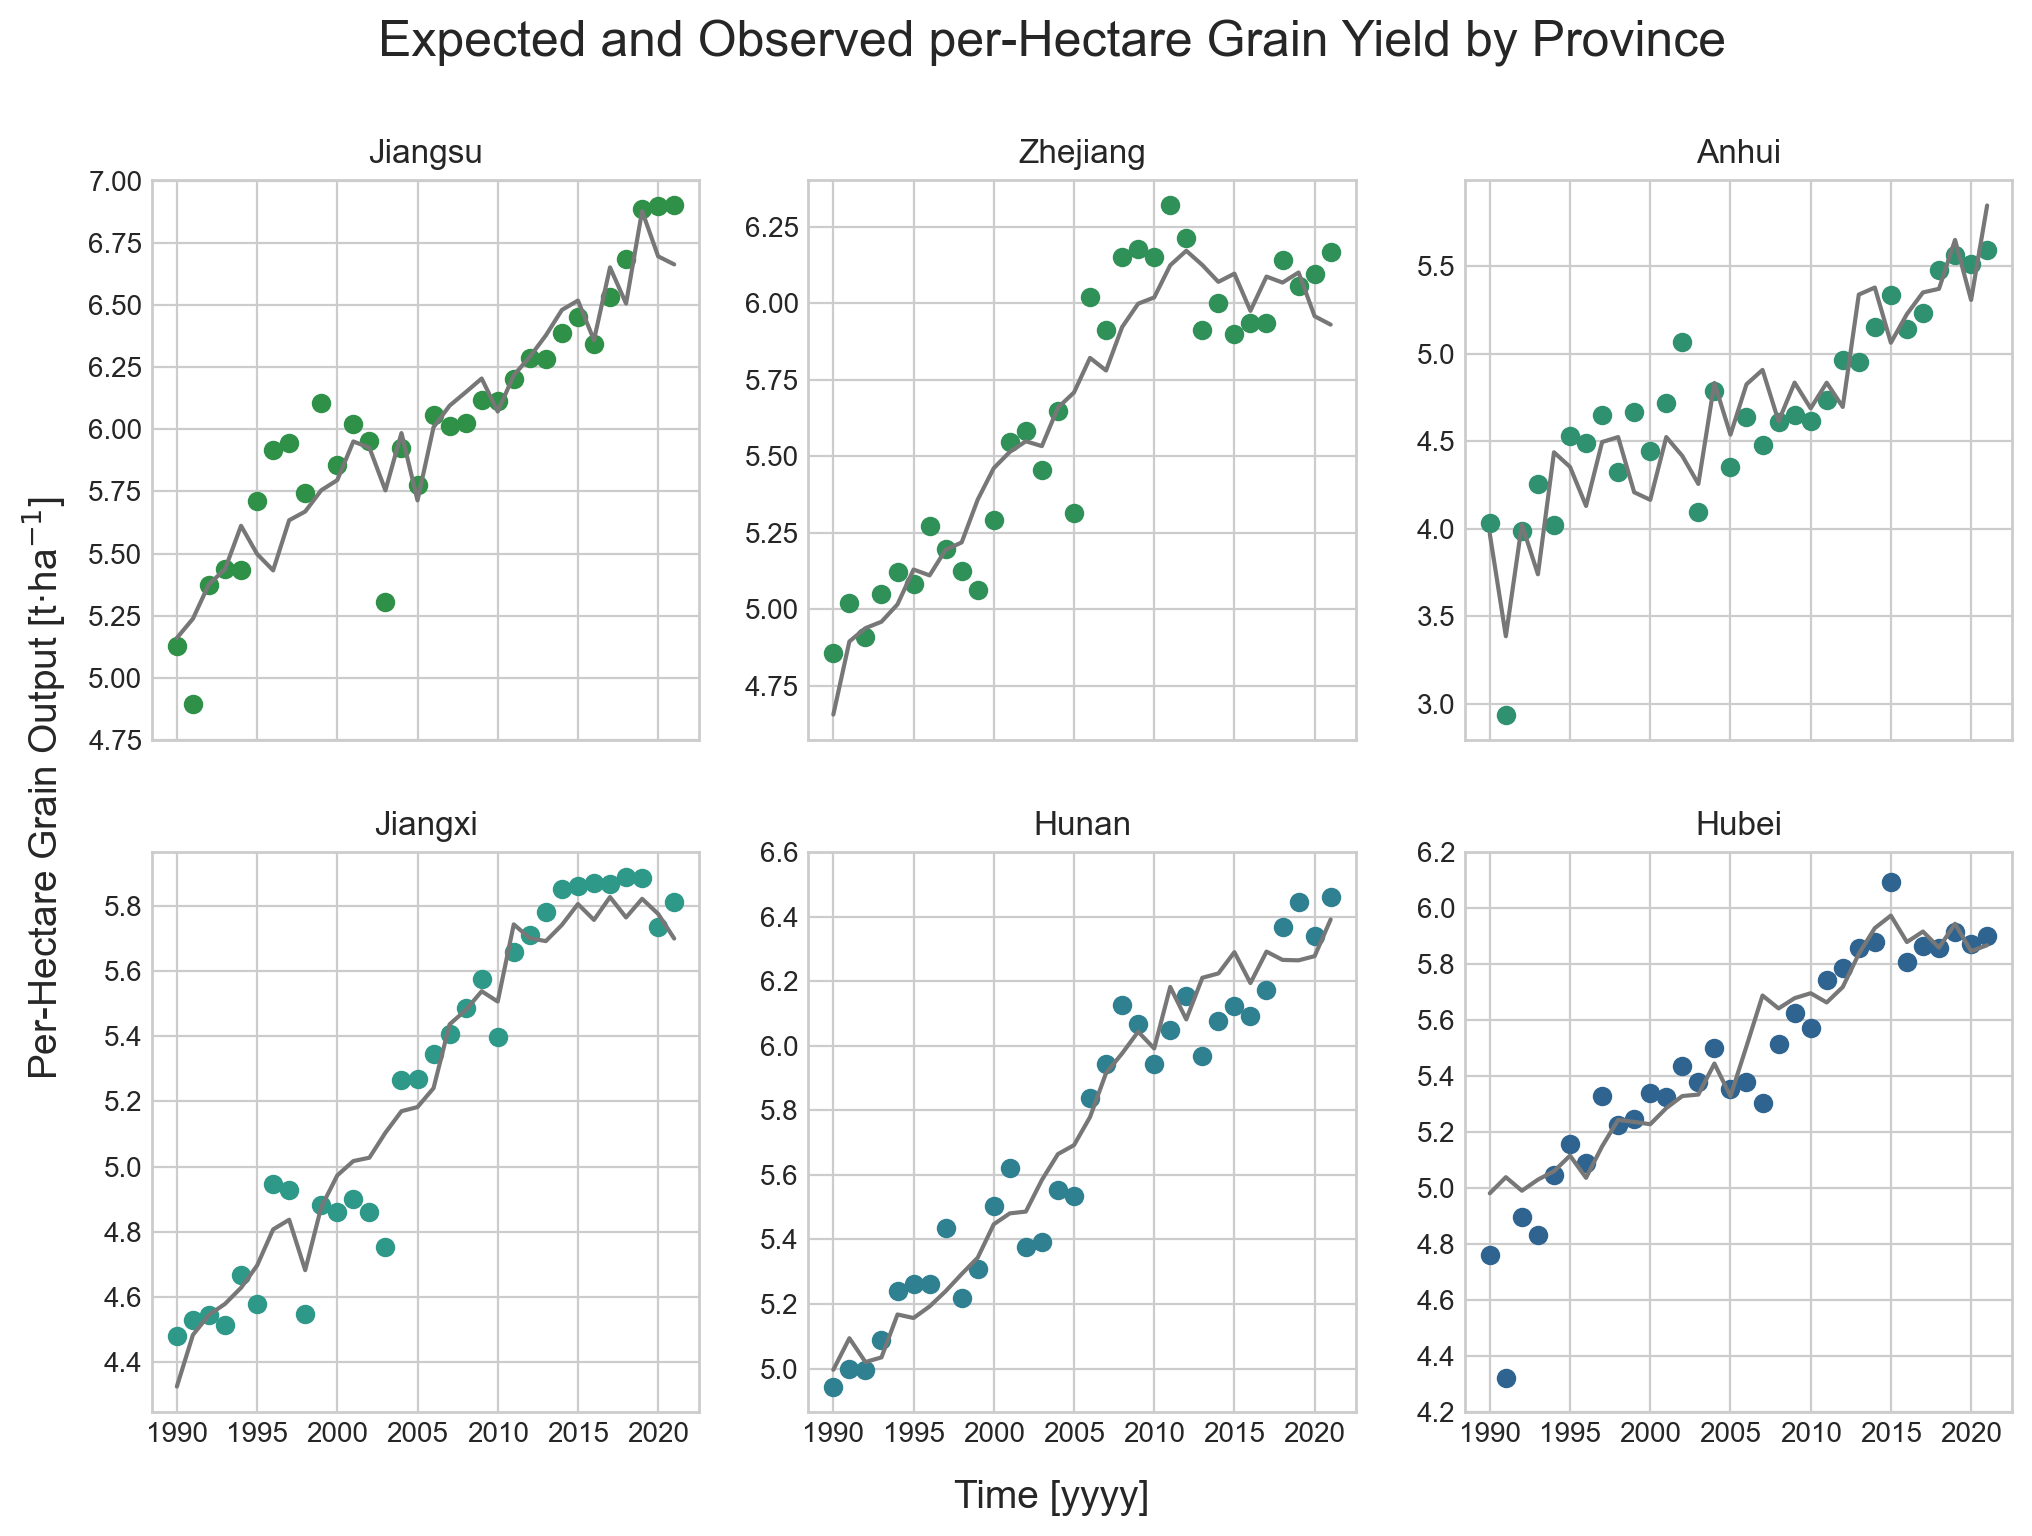

In [71]:
r_ax[1,1].scatter(X[:,2]+1990,np.exp(y),c=cmap[4])
#r_ax[1,1].plot(X[:,2]+1990, np.exp(yall_pred), c=Cln_light)
r_ax[1,1].plot(X[:,2]+1990, np.exp(model_fgls.predict(X)), c=Cln)
r_ax[1,1].set_title('Hunan')
r_ax[1,1].set_xticks(np.arange(1990,2025, 5))
r_ax[1,1].set_yticks(np.arange(5,6.7, 0.2))

r_f

In [72]:
er

[0.0010211742701726483,
 0.0007829285521484318,
 0.0040021703990352426,
 0.00048084493712285405,
 0.0011796207806821805,
 0.0003991806374463031]

# Evaluation

In [73]:
prov=['Jiangsu','Zhejiang','Anhui','Jiangxi','Hubei','Hunan']

In [74]:
olsresid[prov[4]][olsresid[prov[4]]<-0.15]

1   -0.154906
Name: Hubei, dtype: float64

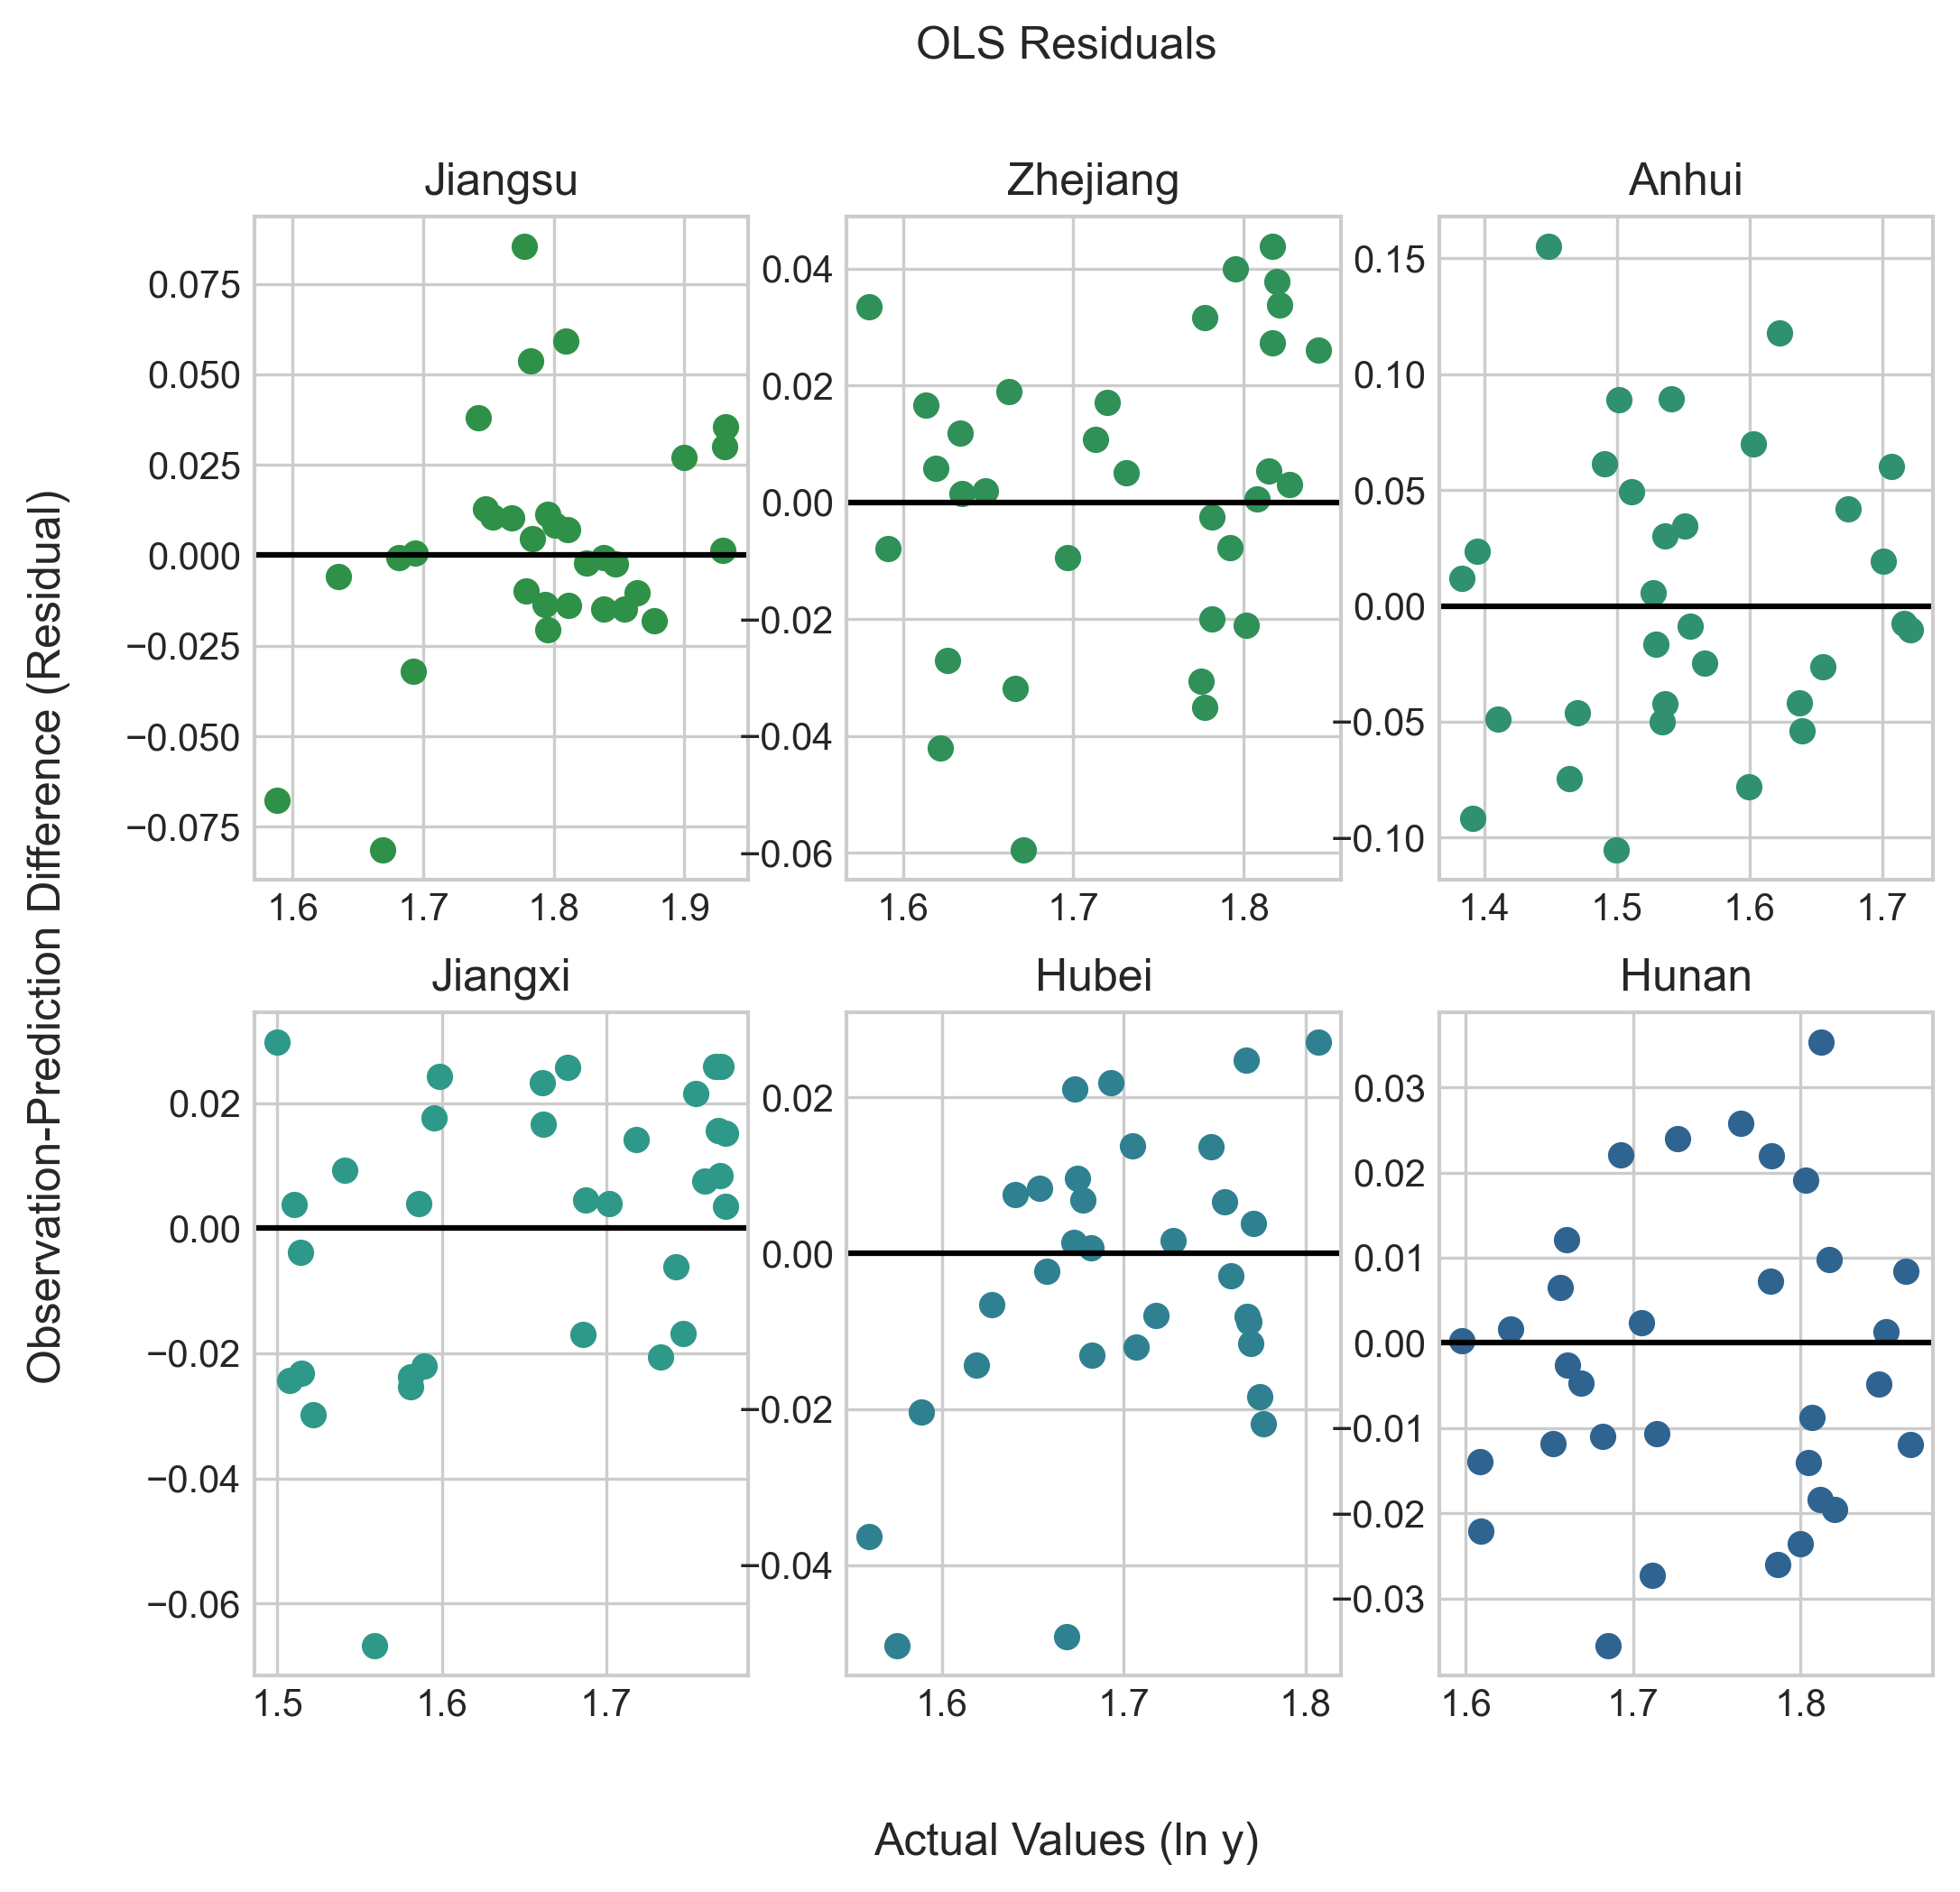

In [75]:
f, ax=plt.subplots(2, 3, figsize=(8,7), dpi=300)

f.suptitle('OLS Residuals')
f.supylabel("Observation-Prediction Difference (Residual)")
f.supxlabel("Actual Values (ln y)")

x='avrGout'
ax[0][0].scatter(JSldf[x], olsresid[prov[0]], c=cmap[0])
ax[0][1].scatter(ZJldf[x], olsresid[prov[1]], c=cmap[1])
ax[0][2].scatter(AHldf[x].drop(1), olsresid[prov[2]].drop(1), c=cmap[2])
ax[1][0].scatter(JXldf[x], olsresid[prov[3]], c=cmap[3])
ax[1][1].scatter(HBldf[x].drop(1), olsresid[prov[4]].drop(1), c=cmap[4])
ax[1][2].scatter(HNldf[x], olsresid[prov[5]], c=cmap[5])

for a in ax:
    for x in a:
        x.axhline(0, c='#000000')

for i in range(0,6):        
    ax[int(i/3)][i%3].set_title(prov[i])
    #plot_pacf(olsresid[prov[i]], ax=ax[int(i/3)][i%3], lags = 10, title=prov[i]) 
    

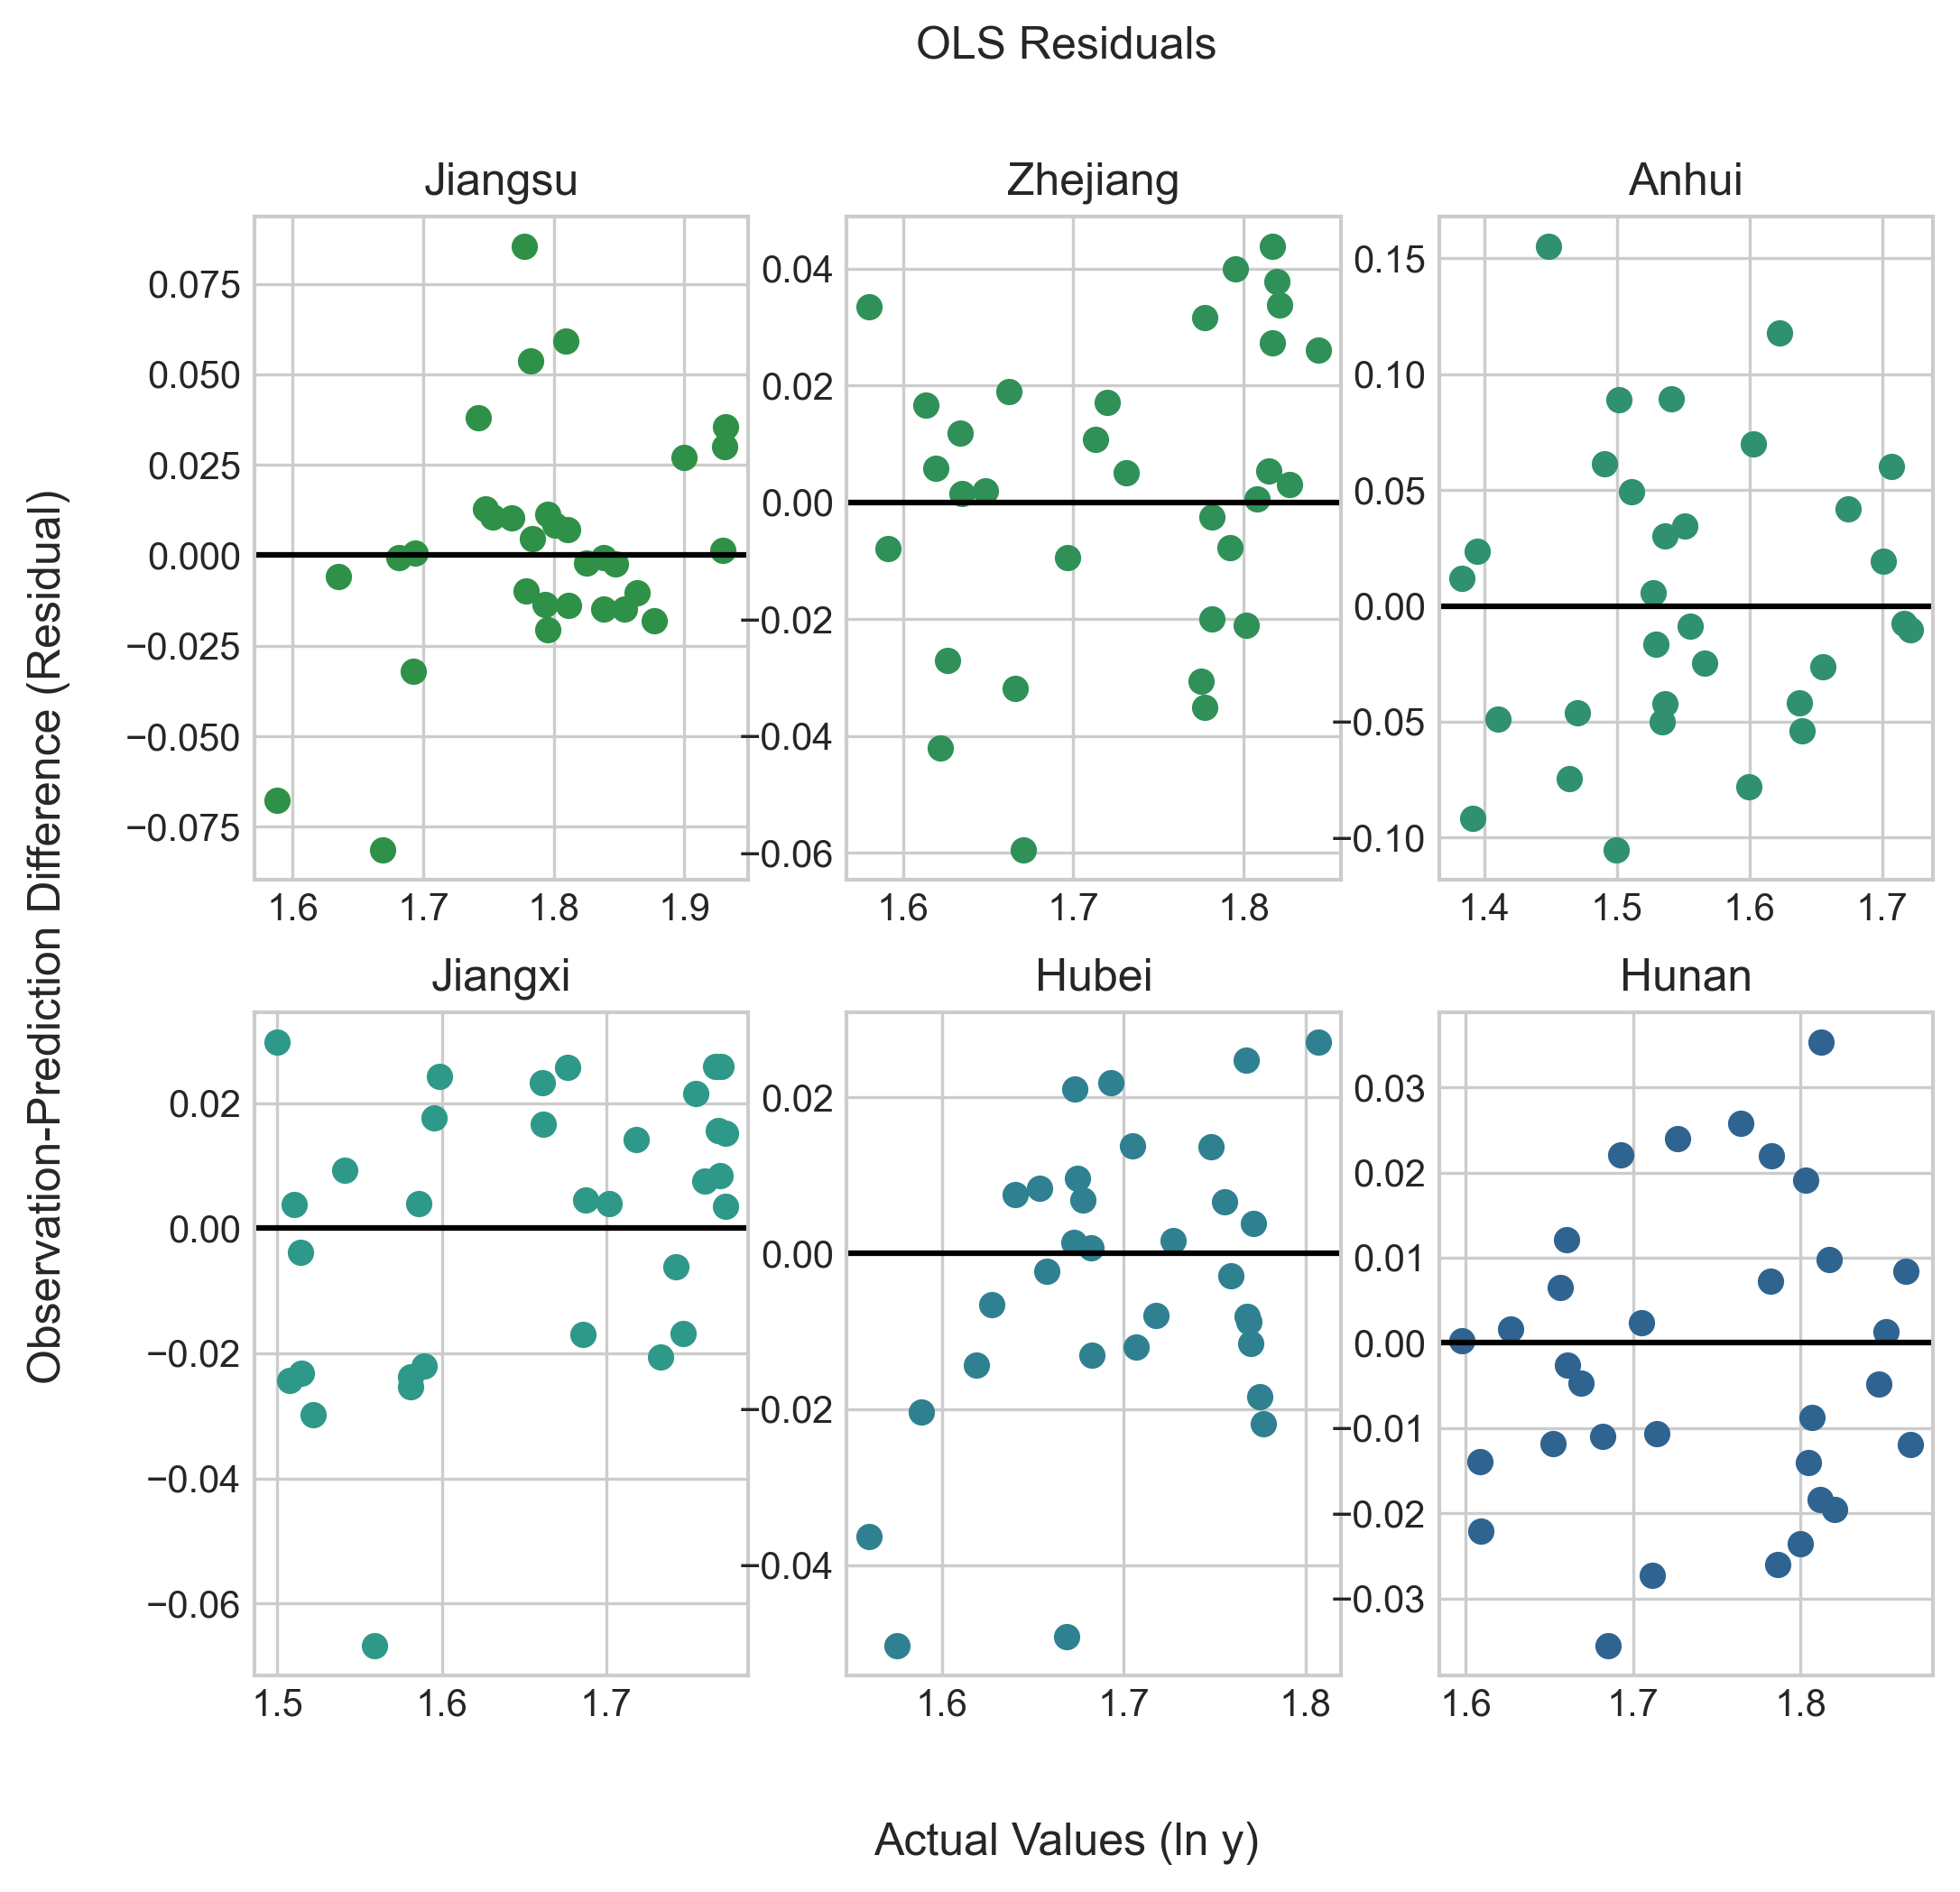

In [76]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
f

In [77]:
rcoef=pd.DataFrame()

In [78]:
rcoef['JS']=jsreg.coef_
rcoef['ZJ']=zjreg.coef_
rcoef['AH']=ahreg.coef_
rcoef['JX']=jxreg.coef_
rcoef['HB']=hbreg.coef_
rcoef['HN']=hnreg.coef_

rcoef

,JS,ZJ,AH,JX,HB,HN
0,0.015874,-0.028224,-0.127521,0.137800,0.007238,-0.000886
1,0.171699,0.168252,0.192180,-0.002905,0.008819,0.039105
2,0.003740,0.006272,-0.005024,0.016330,0.006654,0.007193
3,-0.003847,-0.045026,0.172650,-0.037656,-0.003563,-0.019940
4,-0.000049,-0.000022,-0.000172,-0.000025,-0.000029,-0.000038
5,-0.003134,0.005139,-0.020514,-0.004291,-0.003500,0.002970
6,-0.009463,-0.007421,0.024478,-0.001534,-0.004770,-0.004950


In [79]:
rp

,Jiangsu,Zhejiang,Anhui,Jiangxi,Hubei,Hunan
0,-0.005927,0.042125,0.016128,0.035239,-0.045464,-0.011022
1,-0.067908,0.025156,-0.141889,0.009996,-0.153846,-0.018826
2,-0.000844,-0.005837,-0.008974,-0.000249,-0.018875,-0.004679
3,0.000474,0.017922,0.129506,-0.014034,-0.039922,0.010755
4,-0.032100,0.020910,-0.098598,0.008720,-0.002315,0.014104
5,0.037830,-0.008951,0.040361,-0.025229,0.008264,0.020159
6,0.085098,0.030992,0.083451,0.028586,0.010735,0.013366
7,0.053776,0.000779,0.033249,0.018782,0.034166,0.036628
8,0.013022,-0.017793,-0.045232,-0.029377,-0.003253,-0.014285
9,0.059326,-0.056970,0.103991,0.001513,0.002055,-0.006793


In [80]:
for lines in rp.columns:
    print(shapiro(rp[lines]))

ShapiroResult(statistic=0.9405938386917114, pvalue=0.0778292715549469)
ShapiroResult(statistic=0.9460240602493286, pvalue=0.11107685416936874)
ShapiroResult(statistic=0.9776425361633301, pvalue=0.7287077903747559)
ShapiroResult(statistic=0.9127491116523743, pvalue=0.013283824548125267)
ShapiroResult(statistic=0.7284311056137085, pvalue=2.3817094643163728e-06)
ShapiroResult(statistic=0.960237443447113, pvalue=0.27881237864494324)


In [81]:
ldfy=pd.DataFrame()

ldfy['Jiangsu']=JSldf['avrGout']
ldfy['Zhejiang']=ZJldf['avrGout']
ldfy['Anhui']=AHldf['avrGout']
ldfy['Jiangxi']=JXldf['avrGout']
ldfy['Hubei']=HBldf['avrGout']
ldfy['Hunan']=HNldf['avrGout']

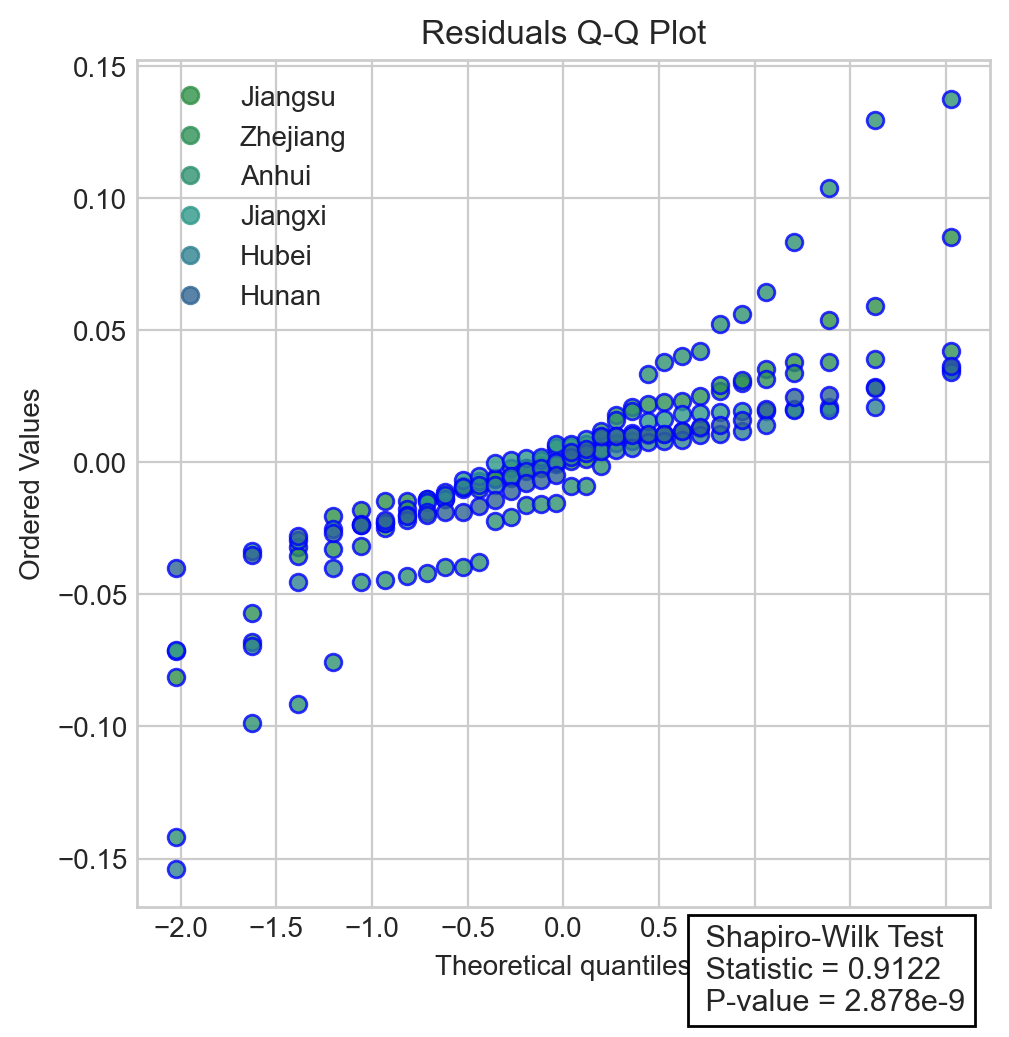

In [82]:
from scipy import stats
from matplotlib.lines import Line2D

prov=['Jiangsu','Zhejiang','Anhui','Jiangxi','Hubei','Hunan']

fig = plt.figure(figsize=(5.5,5.5), dpi=200)
ax = fig.add_subplot(111)
custom=[]
for i in np.arange(0,6):
    res=stats.probplot(rp[prov[i]], dist="norm", fit=False, plot=ax)
    ax.get_lines()[i].set_markerfacecolor(cmap[i])
    ax.get_lines()[i].set_markersize(6)
    ax.get_lines()[i].set_alpha(0.8)
    custom.append(Line2D([0], [0], marker='o', markersize=6, color=cmap[i], alpha=0.8,lw=0,label=prov[i]))

ax.legend(handles=custom, loc='upper left')
ax.text(0.7, -0.21, " Shapiro-Wilk Test\n Statistic = 0.9122\n P-value = 2.878e-9", size=11.,
         ha="left", va="bottom",
         bbox=dict(boxstyle="square",
                   ec='#000000',
                   fc='#ffffff',
                   )
         )

ax.set_title('Residuals Q-Q Plot')

plt.show()

# Predicting Future Behavior

## Fetching CMIP6 Emission Scenarios

In [83]:
def fetch(ssp,d1,d2):
    sspshort=ssp.replace('_','')
    if (d1==1) & (d2==1):
        return (xr.open_mfdataset(f'/Users/maeko/YangtzeModel/data_cams_csm1_0_{ssp}_near_surface_air_temperature/*.nc').groupby("time.year").mean("time"), xr.open_mfdataset(f'/Users/maeko/YangtzeModel/data_cams_csm1_0_{ssp}_precipitation/*.nc').groupby("time.year").sum("time"), xr.open_dataset(f'/Users/maeko/YangtzeModel/sspwave_NEW/{sspshort}_miroc6_coldwave.nc'),xr.open_dataset(f'/Users/maeko/YangtzeModel/sspwave_NEW/{sspshort}_miroc6_heatwave.nc'))
    
    elif (d1==0) & (d2==0):
        return (xr.open_mfdataset(f'/Users/maeko/YangtzeModel/data_cesm2_{ssp}_near_surface_air_temperature/*.nc').groupby("time.year").mean("time"), xr.open_mfdataset(f'/Users/maeko/YangtzeModel/data_cesm2_{ssp}_precipitation/*.nc').groupby("time.year").sum("time"), xr.open_dataset(f'/Users/maeko/YangtzeModel/sspwave_NEW/{sspshort}_bcc_csm2_mr_coldwave.nc'), xr.open_dataset(f'/Users/maeko/YangtzeModel/sspwave_NEW/{sspshort}_bcc_csm2_mr_heatwave.nc'))
    
    elif (d2==0) & (d1==1):
        return (xr.open_mfdataset(f'/Users/maeko/YangtzeModel/data_cams_csm1_0_{ssp}_near_surface_air_temperature/*.nc').groupby("time.year").mean("time"),xr.open_mfdataset(f'/Users/maeko/YangtzeModel/data_cams_csm1_0_{ssp}_precipitation/*.nc').groupby("time.year").sum("time"), xr.open_dataset(f'/Users/maeko/YangtzeModel/sspwave_NEW/{sspshort}_bcc_csm2_mr_coldwave.nc'), xr.open_dataset(f'/Users/maeko/YangtzeModel/sspwave_NEW/{sspshort}_bcc_csm2_mr_heatwave.nc'))
    
    elif (d1==0) & (d2==1):
        return (xr.open_mfdataset(f'/Users/maeko/YangtzeModel/data_cesm2_{ssp}_near_surface_air_temperature/*.nc').groupby("time.year").mean("time"), xr.open_mfdataset(f'/Users/maeko/YangtzeModel/data_cesm2_{ssp}_precipitation/*.nc').groupby("time.year").sum("time"), xr.open_dataset(f'/Users/maeko/YangtzeModel/sspwave_NEW/{sspshort}_miroc6_coldwave.nc'),xr.open_dataset(f'/Users/maeko/YangtzeModel/sspwave_NEW/{sspshort}_miroc6_heatwave.nc'))

In [84]:
ssps=['ssp2_4_5', 'ssp5_8_5']

## Economic Data

In [89]:
YR=28

# Make empty df
empty=pd.DataFrame(index=np.arange(0, YR), columns=JSldf.columns)

In [90]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.optimize import curve_fit

def extrap(df):
    
    # Function to curve fit to the data
    def func(x, a, b):
        return a * x+ b

    # Initial parameter guess, just to kick off the optimization
    guess = (0.5, 0.5)

    # Create copy of data to remove NaNs for curve fitting
    fit_df = df.dropna()

    # Place to store function parameters for each column
    col_params = {}

    # Curve fit each column
    for col in fit_df.columns:
        # Get x & y
        x = fit_df.index.astype(float).values
        y = fit_df[col].values
        # Curve fit column and get curve parameters
        params = curve_fit(func, x, y, guess)
        # Store optimized parameters
        col_params[col] = params[0]

    # Extrapolate each column
    for col in df.columns:
        # Get the index values for NaNs in the column
        x = df[pd.isnull(df[col])].index.astype(float).values
        # Extrapolate those points with the fitted function
        df[col][x] = func(x, *col_params[col])
    
    return df

# Usage:
# Assuming df is your pandas DataFrame with NaN rows at the end
# df = pd.read_csv('path/to/your/data.csv')
# df_extrapolated = extrapolate_dataframe(df)
# print(df_extrapolated)

In [91]:
def makedf(tup, dropbnds=True):
    
    def clip(tup):
        def clipa(ds, drop=False):
            li=[]
            if(drop):
                ds=ds.drop_vars(["lat_bnds", "lon_bnds"])
            for shp in [JS, ZJ, AH, JX, HB, HN]:
                ds.rio.set_spatial_dims('lon', 'lat').rio.write_crs('EPSG:4326', inplace=True)
                li.append(ds.rio.clip(shp.geometry.values, shp.geometry.crs, drop=True))

            return li
    
        clipped=[]
        ifdrop=[True, True, False, False]
        for i in np.arange(0, 4):
            clipped.append(clipa(tup[i], drop=ifdrop[i]))
    
        return clipped
    
    clipped=clip(tup)
    
    ## new is a list with dims [4 (tmean, precip, cw, hw)][6 (JS, ZJ, AH, JX, HB, HN)]
    
    def makeprovinces(li, provnum):
        temp=[]
        for yr in li[0][provnum]['tas'].to_numpy():
            s=np.nansum(yr)
            temp.append(s/np.count_nonzero(~np.isnan(yr))-273.15)  

        precip=[]
        for yr in li[1][provnum]['pr'].to_numpy():
            s=np.nansum(yr)*86400
            precip.append(s/np.count_nonzero(~np.isnan(yr)))

        hwave=[]
        for i in range(0,28):
                f=li[3][provnum]['heatwave_frequency'][i,:,:].to_numpy()
                f[f == -2147483648] = 0
                s=np.nansum(f)
                hwave.append(s/np.count_nonzero(~np.isnan(f)))

        cwave=[]
        for i in range(0,28):
                f=li[2][provnum]['coldwave_frequency'][i,:,:].to_numpy()
                f[f == -2147483648] = 0
                s=np.nansum(f)
                cwave.append(s/np.count_nonzero(~np.isnan(f)))

        linvars=pd.DataFrame()
        linvars['temp_mu']=temp
        linvars['precip_mu']=precip
        linvars['hwave']=hwave
        linvars['cwave']=cwave
    
        return linvars
    
    return makeprovinces(clipped, 0), makeprovinces(clipped,1), makeprovinces(clipped,2), makeprovinces(clipped,3), makeprovinces(clipped,4), makeprovinces(clipped,5)

In [92]:
def find_X(ssp, econs):
    def find_one(ssp, a, b):

        jss, zjs, ahs, jxs, hbs, hns = makedf(fetch(ssp, a, b))
        temp=[jss, zjs, ahs, jxs, hbs, hns]
        
        for i in range(0,6):
            temp[i]['PrimInd']=econs[i]['PrimInd']
            temp[i]['MechPower']=econs[i]['MechPower']
            temp[i]['dt']=econs[i]['dt']
    
    li=[]
    
    for i in [0,1]:
        for j in [0,1]:
            li.append((i,j,find_one(ssp, i, j)))
            
    return li

In [93]:
def ceteris_paribus(num_rows, ldf):

    # Create a dictionary where keys are column names and values are lists 
    # with the unique value repeated num_rows times
    data = {
        "PrimInd": [ldf['PrimInd'][31]] * num_rows,  # Fill column A with the value 1
        "MechPower": [ldf['MechPower'][31]] * num_rows,  # Fill column B with the value 2
        "dt": range(int(ldf['dt'][31]), (int(ldf['dt'][31])+num_rows))
    }

    return pd.DataFrame(data)

def fitstatus(plist, ols, fgls):
    def status_quo(num_rows, ldf):
            data = {
            "PrimInd": [ldf['PrimInd'][31]] * num_rows,  # Fill column A with the value 1
            "MechPower": [ldf['MechPower'][31]] * num_rows,  # Fill column B with the value 2
            "dt": range(int(ldf['dt'][31]), (int(ldf['dt'][31])+num_rows)),
            "temp_mu": [ldf["temp_mu"][31]] * num_rows,
            "precip_mu": [ldf["precip_mu"][31]] * num_rows,
            "hwave": [ldf["hwave"][31]] * num_rows,
            "cwave": [ldf["cwave"][31]] * num_rows,
        }
            return pd.DataFrame(data)
    li=[]
    for i in range(0,6):
        li.append((ols[i].predict(status_quo(28, plist[i]).values), fgls[i].predict(exog=status_quo(28, plist[i]).values)))
    
    return li

In [94]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

    """
    JSF=extrap(pd.concat([JSldf, empty], ignore_index=True)).drop(['avrGout'], axis=1).apply(pd.to_numeric)[32:60].set_index(pd.Series(range(0,28)))
    ZJF=extrap(pd.concat([ZJldf, empty], ignore_index=True)).drop(['avrGout'], axis=1).apply(pd.to_numeric)[32:60].set_index(pd.Series(range(0,28)))
    AHF=extrap(pd.concat([AHldf, empty], ignore_index=True)).drop(['avrGout'], axis=1).apply(pd.to_numeric)[32:60].set_index(pd.Series(range(0,28)))
    JXF=extrap(pd.concat([JXldf, empty], ignore_index=True)).drop(['avrGout'], axis=1).apply(pd.to_numeric)[32:60].set_index(pd.Series(range(0,28)))
    HBF=extrap(pd.concat([HBldf, empty], ignore_index=True)).drop(['avrGout'], axis=1).apply(pd.to_numeric)[32:60].set_index(pd.Series(range(0,28)))
    HNF=extrap(pd.concat([HNldf, empty], ignore_index=True)).drop(['avrGout'], axis=1).apply(pd.to_numeric)[32:60].set_index(pd.Series(range(0,28)))
    """
    
    JSF=ceteris_paribus(28, JSldf)
    ZJF=ceteris_paribus(28, ZJldf)
    AHF=ceteris_paribus(28, AHldf)
    JXF=ceteris_paribus(28, JXldf)
    HBF=ceteris_paribus(28, HBldf)
    HNF=ceteris_paribus(28, HNldf)
    
    olsregressors=[jsreg, zjreg, ahreg, jxreg, hbreg, hnreg]
    fglsreg=[js_fgls, zj_fgls, ah_fgls, jx_fgls, hb_fgls, hn_fgls]
    ldfs=[JSldf, ZJldf, AHldf, JXldf, HBldf, HNldf]
    plist=[JSF, ZJF, AHF, JXF, HBF, HNF]
    """


    for i in np.arange(0,6):
        plist[i][plist[i]<0]=1
        plist[i]['MechPower']=plist[i]['MechPower'].transform('log')
        plist[i]['PrimInd']=plist[i]['PrimInd'].transform('log')

    
JSF, ZJF, AHF, JXF, HBF, HNF = plist
"""
    
    

### Assemble New Models

In [96]:
mli2={}
mli5={}

def etes(sspshort, shp):
    hw=xr.open_dataset(f'sspwave_NEW/{sspshort}_miroc6_heatwave.nc')
    cw=xr.open_dataset(f'sspwave_NEW/{sspshort}_miroc6_coldwave.nc')
    
    hw.rio.set_spatial_dims('lon', 'lat').rio.write_crs('EPSG:4326', inplace=True)
    cw.rio.set_spatial_dims('lon', 'lat').rio.write_crs('EPSG:4326', inplace=True)
    
    hw.rio.clip(shp.geometry.values, shp.geometry.crs, drop=True)
    cw.rio.clip(shp.geometry.values, shp.geometry.crs, drop=True)
    
    return pd.DataFrame(data={'hwave':(hw['heatwave_frequency']*~hw['heatwave_frequency'].isnull()).sum(dim=['lat', 'lon']) / hw['heatwave_frequency'].count(dim=['lat', 'lon']).to_numpy(),
                       'cwave':(cw['coldwave_frequency']*~cw['coldwave_frequency'].isnull()).sum(dim=['lat', 'lon']) / cw['coldwave_frequency'].count(dim=['lat', 'lon']).to_numpy()
                      })

def temperature(ssp, shp):
    temp=xr.open_mfdataset(f'data_cesm2_{ssp}_near_surface_air_temperature/*.nc')
    temp=temp.drop_vars(["lat_bnds", "lon_bnds"]).groupby("time.year").mean("time")
    temp.rio.set_spatial_dims('lon', 'lat').rio.write_crs('EPSG:4326', inplace=True)
    temp.rio.clip(JS.geometry.values, JS.geometry.crs, drop=True)
    return pd.DataFrame(data={'temp_mu':(temp['tas']*~temp['tas'].isnull()).sum(dim=['lat', 'lon']) / temp['tas'].count(dim=['lat', 'lon']).to_numpy()})

for model in ['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2-WACCM', 'CESM2']:
    mli2[model]=pd.concat([JSF, temperature('ssp2_4_5', JS), pd.DataFrame(data={'precip_mu':pd.read_csv(f'ssp245/pr.{model}.csv')['js'][2:].values}), etes('ssp245', JS)], axis=1)
    mli5[model]=pd.concat([JSF, temperature('ssp5_8_5', JS), pd.DataFrame(data={'precip_mu':pd.read_csv(f'ssp585/pr.{model}.csv')['js'][2:].values}), etes('ssp585', JS)], axis=1)

/Users/maeko/opt/anaconda3/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:187: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/Users/maeko/opt/anaconda3/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:187: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/Users/maeko/opt/anaconda3/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:187: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/Users/maeko/opt/anaconda3/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:187: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/Users/maeko/opt/anaconda3/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:187: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/Users/maeko/opt/anaconda3/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:187: RuntimeWarning: inva

In [99]:
sspshort='ssp585'
shp=JS

hw=xr.open_dataset(f'sspwave_NEW/{sspshort}_miroc6_heatwave.nc')
cw=xr.open_dataset(f'sspwave_NEW/{sspshort}_miroc6_coldwave.nc')

hw.rio.set_spatial_dims('lon', 'lat').rio.write_crs('EPSG:4326', inplace=True)
cw.rio.set_spatial_dims('lon', 'lat').rio.write_crs('EPSG:4326', inplace=True)

hw.rio.clip(shp.geometry.values, shp.geometry.crs, drop=True)
cw.rio.clip(shp.geometry.values, shp.geometry.crs, drop=True)

ds=pd.DataFrame(data={'hwave':(hw['heatwave_frequency']*~hw['heatwave_frequency'].isnull()).sum(dim=['lat', 'lon']) / hw['heatwave_frequency'].count(dim=['lat', 'lon']).to_numpy(),
                   'cwave':(cw['coldwave_frequency']*~cw['coldwave_frequency'].isnull()).sum(dim=['lat', 'lon']) / cw['coldwave_frequency'].count(dim=['lat', 'lon']).to_numpy()
                  })

ds

/Users/maeko/opt/anaconda3/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:187: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/Users/maeko/opt/anaconda3/lib/python3.9/site-packages/xarray/core/duck_array_ops.py:187: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)


,hwave,cwave
0,5.948700,2.861694
1,5.937195,2.904236
2,6.005829,2.985443
3,6.031189,2.731995
4,6.141968,2.827515
5,6.101776,2.850098
6,6.042603,2.811523
7,6.268311,2.674561
8,6.285706,2.680939
9,5.887268,2.896118


In [100]:
import copy
ref2 = copy.deepcopy(mli2)

for model in ['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2-WACCM', 'CESM2']:
    ref2[model]['hwave']=0
    ref2[model]['cwave']=0

In [101]:
# Fit and Plot

yproj2=pd.DataFrame()
for model in ['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2-WACCM', 'CESM2']:
    yproj2[model]=js_fgls.predict(mli2[model])
    
yref2=pd.DataFrame()
for model in ['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2-WACCM', 'CESM2']:
    yref2[model]=js_fgls.predict(ref2[model])
    
yproj5=pd.DataFrame()
for model in ['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2-WACCM', 'CESM2']:
    yproj5[model]=js_fgls.predict(mli5[model])

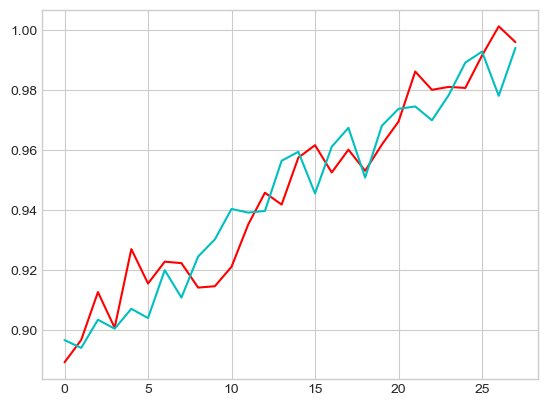

In [104]:
ax=plt.subplot()
ax.plot(yproj2['BCC-CSM2-MR'], c='r')
ax.plot(yproj5['BCC-CSM2-MR'], c='c')

In [ ]:
def preds(ssp):
    
    def predict1(a, b):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            fxn()

            jss, zjs, ahs, jxs, hbs, hns = makedf(fetch(ssp, a, b))

            jss['PrimInd']=JSF['PrimInd']
            zjs['PrimInd']=ZJF['PrimInd']
            ahs['PrimInd']=AHF['PrimInd']
            jxs['PrimInd']=JXF['PrimInd']
            hbs['PrimInd']=HBF['PrimInd']
            hns['PrimInd']=HNF['PrimInd']

            jss['MechPower']=JSF['MechPower']
            zjs['MechPower']=ZJF['MechPower']
            ahs['MechPower']=AHF['MechPower']
            jxs['MechPower']=JXF['MechPower']
            hbs['MechPower']=HBF['MechPower']
            hns['MechPower']=HNF['MechPower']

            jss['dt']=JSF['dt']
            zjs['dt']=ZJF['dt']
            ahs['dt']=AHF['dt']
            jxs['dt']=JXF['dt']
            hbs['dt']=HBF['dt']
            hns['dt']=HNF['dt']

            def reorder(df):
                return df[[c for c in ['PrimInd', 'MechPower', 'dt'] if c in df]+[c for c in df if c not in ['PrimInd', 'MechPower', 'dt']]]

            jss=reorder(jss)
            zjs=reorder(zjs)
            ahs=reorder(ahs)
            jxs=reorder(jxs)
            hbs=reorder(hbs)
            hns=reorder(hns)

            olspred=pd.DataFrame()
            olspred['Jiangsu']=jsreg.predict(jss.values)
            olspred['Zhejiang']=zjreg.predict(zjs.values)
            olspred['Anhui']=ahreg.predict(ahs.values)
            olspred['Jiangxi']=jxreg.predict(jxs.values)
            olspred['Hubei']=hbreg.predict(hbs.values)
            olspred['Hunan']=hnreg.predict(hns.values)

            fglspred=pd.DataFrame()
            fglspred['Jiangsu']=js_fgls.predict(exog=jss.values)
            fglspred['Zhejiang']=zj_fgls.predict(exog=zjs.values)
            fglspred['Anhui']=ah_fgls.predict(exog=ahs.values)
            fglspred['Jiangxi']=jx_fgls.predict(exog=jxs.values)
            fglspred['Hubei']=hb_fgls.predict(exog=hbs.values)
            fglspred['Hunan']=hn_fgls.predict(exog=hns.values)

        return pd.concat([olspred, fglspred], keys=['ols', 'fgls'])
    
    li=[]
    for i in [0,1]:
        for j in [0,1]:
            li.append((i,j,predict1(i,j)))
    
    return li

In [ ]:
ssp1=preds('ssp1_2_6')
ssp2=preds('ssp2_4_5')
ssp3=preds('ssp3_7_0')
ssp5=preds('ssp5_8_5')

In [ ]:
statusquo

## Fitting, Graphing

In [ ]:
from scipy import stats
from sklearn.linear_model import LinearRegression

def get_conf_int(alpha, lr, X, y):
    
    """
    Returns (1-alpha) 2-sided confidence intervals
    for sklearn.LinearRegression coefficients
    as a pandas DataFrame
    """
    
    coefs = np.r_[[lr.intercept_], lr.coef_]
    X_aux = X.copy()
    X_aux.insert(0, 'const', 1)
    dof = -np.diff(X_aux.shape)[0]
    mse = np.sum((y - lr.predict(X)) ** 2) / dof
    var_params = np.diag(np.linalg.inv(X_aux.T.dot(X_aux)))
    t_val = stats.t.isf(alpha/2, dof)
    gap = t_val * np.sqrt(mse * var_params)

    return pd.DataFrame({
        'lower': coefs - gap, 'upper': coefs + gap
    }, index=X_aux.columns)

In [ ]:
ssp1[3][2].loc['ols']['Jiangsu']

In [ ]:
#predict_ax[0].plot(np.exp(statusquo[0][0]), c='#000000')
#predict_ax[0].plot(np.exp(statusquo[0][1]), c='#000000')

colors=['r', 'brown', 'b', 'cyan']

def expsum(statusquo,index):
    sum=np.exp(statusquo[0][index])
    for i in range(1, len(statusquo)):
        sum=np.add(sum, np.exp(statusquo[i][index]))
        
    return sum

def dfsspsum(tup, regtype):
    dss=[]
    for i in [0,1,2,3]:
        dss.append((tup[i][0], tup[i][1], tup[i][2].loc[regtype].transform(np.exp)))
    
    ret=[]
    for i in [0,1,2,3]:
        ret.append((dss[i][0], dss[i][1], dss[i][2].sum(axis=1)))
    
    return ret

status=expsum(statusquo,0)
gr1=dfsspsum(ssp1, 'ols')
gr2=dfsspsum(ssp2, 'ols')
gr3=dfsspsum(ssp3, 'ols')
gr5=dfsspsum(ssp5, 'ols')

In [ ]:
cmap

In [ ]:
c1='#2f9189'
c2='#919191'
c3='#809724'
c5='#9e7b1b'

yo=1990
yf=2052
dyyyy=10

plt.style.use('seaborn-v0_8-whitegrid')

predict_f, predict_ax = plt.subplots(2,3,sharex=True, figsize=[12,8])

predict_f.suptitle('Prediction of Average Grain Yield compared with the Status Quo as of 2021', y=0.95, fontsize=18)
predict_f.text(0.5, 0.05, 'Time [yyyy]', ha='center', fontsize=14)
predict_f.text(0.07, 0.5, 'Difference in Mean Grain Yield [t·ha$^{-1}$]', va='center', rotation='vertical', fontsize=14)

"""
predict_ax[0,0].plot(status, c=c2)


for i in range(0,4):
    predict_ax[0,0].plot(gr1[i][2], c=c1)
    predict_ax[0,0].plot(gr2[i][2], c=c2)
    predict_ax[0,0].plot(gr3[i][2], c=c2)
    predict_ax[0,0].plot(gr5[i][2], c='cyan')

"""
for n in range(0,6):
    for i in range (0,4):
        #predict_ax[int(n/3)][n%3].plot(-np.exp(statusquo[n][0])+np.exp(ssp1[i][2].loc['ols'][prov[n]].values), c='b')
        #predict_ax[int(n/3)][n%3].plot(range(2022,2050),-np.exp(statusquo[n][1])+np.exp(ssp2[i][2].loc['fgls'][prov[n]].values), c='#999999')
        predict_ax[int(n/3)][n%3].axhline(y = 0, color = '#000000', linestyle = 'dashed')  
        
        #predict_ax[int(n/3)][n%3].plot(-np.exp(statusquo[n][0])+np.exp(ssp3[i][2].loc['ols'][prov[n]].values), c='g')
        #predict_ax[int(n/3)][n%3].plot(range(2022,2050),-np.exp(statusquo[n][1])+np.exp(ssp3[i][2].loc['fgls'][prov[n]].values), c='#777777')

        #predict_ax[int(n/3)][n%3].plot(-np.exp(statusquo[n][0])+np.exp(ssp1[i][2].loc['ols'][prov[n]].values), c='y')
        #predict_ax[int(n/3)][n%3].plot(range(2022,2050),-np.exp(statusquo[n][1])+np.exp(ssp1[i][2].loc['fgls'][prov[n]].values), c=Ctr)

        #predict_ax[int(n/3)][n%3].plot(-np.exp(statusquo[n][0])+np.exp(ssp5[i][2].loc['ols'][prov[n]].values), c='#000000')
        predict_ax[int(n/3)][n%3].plot(range(2022,2050),np.exp(ssp1[i][2].loc['fgls'][prov[n]].values)-np.exp(ssp3[i][2].loc['fgls'][prov[n]].values), c=bymodel[i])
        
        predict_ax[int(n/3)][n%3].set_title(prov[n])

In [ ]:
fglsreg

In [ ]:
bymodel=['darksalmon','lightblue','slategray','crimson']
plt.style.use('seaborn-v0_8-whitegrid')

predict_f, predict_ax = plt.subplots(2,3,sharex=True, figsize=[12,8],dpi=300)

predict_f.suptitle('Change in per-Hectare Grain Yield under Different SSP Emission Scenarios', fontsize=18)
predict_f.supxlabel('Time [yyyy]', ha='center', fontsize=14)
predict_f.supylabel('Difference in per-Hectare Grain Yield [t·ha$^{-1}$]', va='center', rotation='vertical', fontsize=14)

n=0

predict_ax[int(n/3)][n%3].axhline(y = 0, color = '#000000', linestyle = 'dashed')  

predict_ax[int(n/3)][n%3].plot(range(2022,2050),-np.exp(statusquo[n][1])+np.exp(ssp2[i][2].loc['fgls'][prov[n]].values), label="SSP1-2.6", c='goldenrod')

#predict_ax[int(n/3)][n%3].plot(-np.exp(statusquo[n][0])+np.exp(ssp3[i][2].loc['ols'][prov[n]].values), c='g')
predict_ax[int(n/3)][n%3].plot(range(2022,2050),-np.exp(statusquo[n][1])+np.exp(ssp3[i][2].loc['fgls'][prov[n]].values), label="SSP2-4.5", c='#dddddd')

#predict_ax[int(n/3)][n%3].plot(-np.exp(statusquo[n][0])+np.exp(ssp1[i][2].loc['ols'][prov[n]].values), c='y')
predict_ax[int(n/3)][n%3].plot(range(2022,2050),-np.exp(statusquo[n][1])+np.exp(ssp1[i][2].loc['fgls'][prov[n]].values), label="SSP3-7.0", c='#999999')

predict_ax[int(n/3)][n%3].plot(range(2022,2050),-np.exp(statusquo[n][1])+np.exp(ssp2[i][2].loc['fgls'][prov[n]].values), c='goldenrod')

#predict_ax[int(n/3)][n%3].plot(-np.exp(statusquo[n][0])+np.exp(ssp5[i][2].loc['ols'][prov[n]].values), c='#000000')
predict_ax[int(n/3)][n%3].plot(range(2022,2050),-np.exp(statusquo[n][1])+np.exp(ssp5[i][2].loc['fgls'][prov[n]].values), label="SSP5-8.5", c='chocolate')

predict_ax[int(n/3)][n%3].set_title(prov[n])

for n in range(1,6):
        i = 3
        #predict_ax[int(n/3)][n%3].plot(-np.exp(statusquo[n][0])+np.exp(ssp1[i][2].loc['ols'][prov[n]].values), c='b')
        
        predict_ax[int(n/3)][n%3].axhline(y = 0, color = '#000000', linestyle = 'dashed')  
        
        #predict_ax[int(n/3)][n%3].plot(-np.exp(statusquo[n][0])+np.exp(ssp3[i][2].loc['ols'][prov[n]].values), c='g')
        predict_ax[int(n/3)][n%3].plot(range(2022,2050),-np.exp(statusquo[n][1])+np.exp(ssp3[i][2].loc['fgls'][prov[n]].values), c='#dddddd')

        #predict_ax[int(n/3)][n%3].plot(-np.exp(statusquo[n][0])+np.exp(ssp1[i][2].loc['ols'][prov[n]].values), c='y')
        predict_ax[int(n/3)][n%3].plot(range(2022,2050),-np.exp(statusquo[n][1])+np.exp(ssp1[i][2].loc['fgls'][prov[n]].values), c='#999999')
        
        predict_ax[int(n/3)][n%3].plot(range(2022,2050),-np.exp(statusquo[n][1])+np.exp(ssp2[i][2].loc['fgls'][prov[n]].values), c='goldenrod')

        #predict_ax[int(n/3)][n%3].plot(-np.exp(statusquo[n][0])+np.exp(ssp5[i][2].loc['ols'][prov[n]].values), c='#000000')
        predict_ax[int(n/3)][n%3].plot(range(2022,2050),-np.exp(statusquo[n][1])+np.exp(ssp5[i][2].loc['fgls'][prov[n]].values), c='chocolate')
        
        predict_ax[int(n/3)][n%3].set_title(prov[n])

predict_f.legend(loc='center right')

In [ ]:
c1='#2f9189'
c2='#919191'
c3='#809724'
c5='#9e7b1b'

yo=1990
yf=2052
dyyyy=10

plt.style.use('seaborn-v0_8-whitegrid')

predict_f, predict_ax = plt.subplots(2,3, sharey=False, figsize=[12,8],dpi=300)

predict_f.suptitle('Model Yield Prediction Difference between SSP2-4.5 and SSP5-8.5', y=0.95, fontsize=18)
predict_f.supxlabel( 'Time [yyyy]', ha='center', fontsize=14)
predict_f.supylabel( 'Difference in per-Hectare Grain Yield [t·ha$^{-1}$]', va='center', rotation='vertical', fontsize=14)

"""
predict_ax[0,0].plot(status, c=c2)


for i in range(0,4):
    predict_ax[0,0].plot(gr1[i][2], c=c1)
    predict_ax[0,0].plot(gr2[i][2], c=c2)
    predict_ax[0,0].plot(gr3[i][2], c=c2)
    predict_ax[0,0].plot(gr5[i][2], c='cyan')

"""




n=0
ds=np.exp(ssp1[i][2].loc['fgls'][prov[n]].values)-np.exp(ssp3[i][2].loc['fgls'][prov[n]].values)
predict_ax[int(n/3)][n%3].axhline(y = 0, color = '#000000', linestyle = 'dashed') 
for i in range (2,4):

    ds=pd.concat([pd.DataFrame(ds), pd.DataFrame(-np.exp(ssp1[i][2].loc['fgls'][prov[n]].values)+np.exp(ssp5[i][2].loc['fgls'][prov[n]].values))],axis=1)

#predict_ax[int(n/3)][n%3].plot(-np.exp(statusquo[n][0])+np.exp(ssp5[i][2].loc['ols'][prov[n]].values), c='#000000')
predict_ax[int(n/3)][n%3].plot(ds.index, ds.mean(axis=1).values, label='Mean', color='teal')
predict_ax[int(n/3)][n%3].fill_between(ds.index, ds.max(axis=1).values, ds.min(axis=1).values, label='Range', color='cadetblue', alpha=.2)
z = np.polyfit(ds.index, ds.mean(axis=1).values, 3)
p = np.poly1d(z)
predict_ax[int(n/3)][n%3].plot(ds.index, p(ds.index), label='Trend', color='lightseagreen')

predict_ax[int(n/3)][n%3].set_title(prov[n])

for n in range(1,6):
    ds=np.exp(ssp1[i][2].loc['fgls'][prov[n]].values)-np.exp(ssp3[i][2].loc['fgls'][prov[n]].values)
    predict_ax[int(n/3)][n%3].axhline(y = 0, color = '#000000', linestyle = 'dashed') 
    for i in range (2,4):
        #predict_ax[int(n/3)][n%3].plot(-np.exp(statusquo[n][0])+np.exp(ssp1[i][2].loc['ols'][prov[n]].values), c='b')
        #predict_ax[int(n/3)][n%3].plot(range(2022,2050),-np.exp(statusquo[n][1])+np.exp(ssp2[i][2].loc['fgls'][prov[n]].values), c='#999999')
        
        #predict_ax[int(n/3)][n%3].plot(-np.exp(statusquo[n][0])+np.exp(ssp3[i][2].loc['ols'][prov[n]].values), c='g')
        #predict_ax[int(n/3)][n%3].plot(range(2022,2050),-np.exp(statusquo[n][1])+np.exp(ssp3[i][2].loc['fgls'][prov[n]].values), c='#777777')

        #predict_ax[int(n/3)][n%3].plot(-np.exp(statusquo[n][0])+np.exp(ssp1[i][2].loc['ols'][prov[n]].values), c='y')
        #predict_ax[int(n/3)][n%3].plot(range(2022,2050),-np.exp(statusquo[n][1])+np.exp(ssp1[i][2].loc['fgls'][prov[n]].values), c=Ctr)
        
        ds=pd.concat([pd.DataFrame(ds), pd.DataFrame(-np.exp(ssp1[i][2].loc['fgls'][prov[n]].values)+np.exp(ssp5[i][2].loc['fgls'][prov[n]].values))],axis=1)
                
    #predict_ax[int(n/3)][n%3].plot(-np.exp(statusquo[n][0])+np.exp(ssp5[i][2].loc['ols'][prov[n]].values), c='#000000')
    predict_ax[int(n/3)][n%3].plot(ds.index, ds.mean(axis=1).values, color='teal')
    predict_ax[int(n/3)][n%3].fill_between(ds.index, ds.max(axis=1).values, ds.min(axis=1).values, color='cadetblue', alpha=.2)
    z = np.polyfit(ds.index, ds.mean(axis=1).values, 3)
    p = np.poly1d(z)
    predict_ax[int(n/3)][n%3].plot(ds.index, p(ds.index), color='lightseagreen')
    
    predict_ax[int(n/3)][n%3].set_title(prov[n])
    
predict_f.legend(loc='center right')

In [ ]:
ds

In [ ]:
predict_f

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')

f, ax = plt.subplots(2,3,sharex=True, figsize=[12,8])

for n in range(0,6):
    df=ssp1[i][2].loc['fgls'][prov[n]]
    for i in range(1,4):
        df=pd.concat([pd.DataFrame(df), pd.DataFrame(ssp1[i][2].loc['fgls'][prov[n]])],axis=1)

    ax[int(n/3)][n%3].plot(df.index, np.exp(df.mean(axis=1).values), color='blue')
    ax[int(n/3)][n%3].fill_between(df.index, np.exp(df.max(axis=1).values), np.exp(df.min(axis=1).values), color='blue', alpha=.1)
    
    df=ssp5[i][2].loc['fgls'][prov[n]]
    for i in range(1,4):
        df=pd.concat([pd.DataFrame(df), pd.DataFrame(ssp5[i][2].loc['fgls'][prov[n]])],axis=1)

    ax[int(n/3)][n%3].plot(df.index, np.exp(df.mean(axis=1).values), color='red')
    ax[int(n/3)][n%3].fill_between(df.index, np.exp(df.max(axis=1).values), np.exp(df.min(axis=1).values), color='red', alpha=.1)

In [ ]:
df

# Plotting and Figures

## Climate Indicators

In [ ]:
import cartopy.crs as ccrs

%matplotlib inline
f, ax = plt.subplots(1, 5, figsize= (15,3))

yr=1990+13

ax[0].pcolormesh(multitemp.air[yr-1948,:], cmap='Greys')
ax[1].pcolormesh(multisoil.soilw[yr-1948,:], cmap='Greys')
ax[2].pcolormesh(multiprecip.precip[yr-1990,:], cmap='Greys')
ax[3].pcolormesh(multihwave.HeatWaveOccurence[:,:,yr-1980], cmap='Greys')
ax[4].pcolormesh(multicwave.tmin[:,:,yr-1980], cmap='Greys')

ax[0].set_title(str(yr)+' Mean Temperature')
ax[1].set_title(str(yr)+' Soil Moisture Index')
ax[2].set_title(str(yr)+' Mean Precipitation')
ax[3].set_title(str(yr)+' Heatwave Frequency')
ax[4].set_title(str(yr)+' Coldwave Frequency')

for sub in ax:
        sub.invert_yaxis()
        sub.axis('equal')